<a href="https://colab.research.google.com/github/igor-bogdanov/ProjectVAE_Bogdanov/blob/main/NonlinearDimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tqdm

In [2]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Загрузка с google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
#X = np.genfromtxt('data_simulation_10k.txt', dtype=int, delimiter=', ')

flag_drive = True
if flag_drive:
  X = np.genfromtxt('/content/drive/MyDrive/data_simulation_10k.txt', dtype=int, delimiter=', ')#_300samp.txt', dtype=int, delimiter=', ')
  #X = np.genfromtxt('/content/drive/MyDrive/data_300_samp_10k_chr_adm_0_25.txt', dtype=int, delimiter=', ')#_300samp.txt', dtype=int, delimiter=', ')
  #X = np.genfromtxt('/content/drive/MyDrive/data_simulation_newmsprime_10k_300samp_upd.txt', dtype=int, delimiter=', ')
  #X = np.genfromtxt('/content/drive/MyDrive/data_simulation_newmsprime_10k_300samp_upd.txt', dtype=int, delimiter=', ')
  
  ####X = np.transpose(X)

#labels = np.genfromtxt('labels_temp.txt', dtype=int, delimiter=', ')

y = np.zeros(X.shape[0])
y[100:200] = 1
y[200:] = 2

##### Разкомментить, если использую newmsprime...
#####y[200:400] = 1
#####y[400:] = 2

# shuffle
shuffle_arr = np.column_stack((X, y))
np.random.shuffle(shuffle_arr)
X = shuffle_arr[:, :-1]
y = shuffle_arr[:, -1]

le = LabelEncoder()
labels = le.fit_transform(y)

In [ ]:
X.shape

(300, 10000)

In [ ]:
# Вариант 08.07.21
#X = np.genfromtxt('data_simulation_10k.txt', dtype=int, delimiter=', ')

flag_drive = True
if flag_drive:
  X = np.genfromtxt('/content/drive/MyDrive/ABCD_AD_BD_CD_second_10k_14_07_21.txt', dtype=int, delimiter=', ')
  X = np.transpose(X)

#labels = np.genfromtxt('labels_temp.txt', dtype=int, delimiter=', ')

y = np.zeros(X.shape[0])
y[100:200] = 1
y[200:300] = 2
y[300:400] = 3
y[400:500] = 4
y[500:600] = 5
y[600:700] = 6
#y[700:] = 7

# shuffle
shuffle_arr = np.column_stack((X, y))
np.random.shuffle(shuffle_arr)
X = shuffle_arr[:, :-1]
y = shuffle_arr[:, -1]

le = LabelEncoder()
labels = le.fit_transform(y)

In [ ]:
# Моделирование из статьи https://www.biorxiv.org/content/10.1101/2021.04.11.439381v3.full
N_red = 10
N_green = 5
N_blue = 10
N_black = 200

X = np.zeros((N_red+N_green+N_blue+N_black, 3), dtype=np.float32)
X[:N_red, 0] = 1
X[N_red:N_red+N_green, 1] = 1
X[N_red+N_green:N_red+N_green+N_blue, 2] = 1

y = np.zeros(X.shape[0])
y[:N_red] = 1 #red
y[N_red:N_red+N_green] = 2 #green
y[N_red+N_green:N_red+N_green+N_blue] = 3 #blue
y[N_red+N_green+N_blue:] = 4 #black

# shuffle
shuffle_arr = np.column_stack((X, y))
np.random.shuffle(shuffle_arr)
X = shuffle_arr[:, :-1]
y = shuffle_arr[:, -1]

le = LabelEncoder()
labels = le.fit_transform(y)

In [ ]:
X.shape

(225, 3)

In [ ]:
!pip install cyvcf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.8 MB/s eta 0:00:00


In [ ]:
from cyvcf2 import VCF, Writer

In [ ]:
vcf_file = VCF('Kidd.55AISNP.1kG.vcf')
#vcf_file = VCF('ALL.chr22.phase3_shapeit2_mvncall_integrated_v4.20130502.genotypes_10k.vcf.gz')
#vcf_file = VCF('ALL.chr17.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz')
#vcf_file = VCF('Pundamilia.RAD.vcf.gz')

data = pd.DataFrame(index=vcf_file.samples)
flag = 0
temp = []
print(vcf_file.samples)
for variant in vcf_file():
    if(flag == 2):
      print(type(variant))
      print(variant.gt_types)
      temp=variant.gt_types
      print(variant)
    

    #data[variant.ID] = variant.gt_types
    data[str(flag)] = variant.gt_types
    flag +=1
    if(flag % 10000 == 0):
      print(flag)

data.head()

['HG00096', 'HG00097', 'HG00099', 'HG00100', 'HG00101', 'HG00102', 'HG00103', 'HG00105', 'HG00106', 'HG00107', 'HG00108', 'HG00109', 'HG00110', 'HG00111', 'HG00112', 'HG00113', 'HG00114', 'HG00115', 'HG00116', 'HG00117', 'HG00118', 'HG00119', 'HG00120', 'HG00121', 'HG00122', 'HG00123', 'HG00125', 'HG00126', 'HG00127', 'HG00128', 'HG00129', 'HG00130', 'HG00131', 'HG00132', 'HG00133', 'HG00136', 'HG00137', 'HG00138', 'HG00139', 'HG00140', 'HG00141', 'HG00142', 'HG00143', 'HG00145', 'HG00146', 'HG00148', 'HG00149', 'HG00150', 'HG00151', 'HG00154', 'HG00155', 'HG00157', 'HG00158', 'HG00159', 'HG00160', 'HG00171', 'HG00173', 'HG00174', 'HG00176', 'HG00177', 'HG00178', 'HG00179', 'HG00180', 'HG00181', 'HG00182', 'HG00183', 'HG00185', 'HG00186', 'HG00187', 'HG00188', 'HG00189', 'HG00190', 'HG00231', 'HG00232', 'HG00233', 'HG00234', 'HG00235', 'HG00236', 'HG00237', 'HG00238', 'HG00239', 'HG00240', 'HG00242', 'HG00243', 'HG00244', 'HG00245', 'HG00246', 'HG00250', 'HG00251', 'HG00252', 'HG00253'

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
HG00096,0,1,0,3,0,0,0,1,0,3,...,0,0,1,0,0,3,3,1,1,0
HG00097,0,3,0,3,0,0,0,0,0,3,...,1,0,3,0,0,3,1,0,0,1
HG00099,0,1,0,1,3,1,0,3,0,3,...,0,0,1,0,0,1,1,0,0,1
HG00100,0,3,0,3,0,0,0,3,1,3,...,1,0,3,1,0,3,3,0,0,0
HG00101,0,1,0,3,1,1,0,3,3,3,...,0,0,3,0,0,3,3,1,0,1


In [ ]:
# One-hot encoding
ncols = len(data.columns)
ohe = OneHotEncoder(categories=[range(4)] * ncols, sparse=False)

X = ohe.fit_transform(data.values)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
samples = 'ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/integrated_call_samples_v3.20130502.ALL.panel'
dfsamples = pd.read_csv(samples, sep='\t')
dfsamples.set_index('sample', inplace=True)
dfsamples.drop(columns=['Unnamed: 4', 'Unnamed: 5'], inplace=True)

dfsamples.head()

,pop,super_pop,gender
sample,,,
HG00096,GBR,EUR,male
HG00097,GBR,EUR,female
HG00099,GBR,EUR,female
HG00100,GBR,EUR,female
HG00101,GBR,EUR,male


In [ ]:
# Кодирование популяций
le = LabelEncoder()
labels = le.fit_transform(dfsamples['super_pop'].values)
y = labels.copy()

In [ ]:
# Классы
le.inverse_transform(np.unique(labels))

array(['AFR', 'AMR', 'EAS', 'EUR', 'SAS'], dtype=object)

In [ ]:
%%time
X_pca = PCA(n_components=2).fit_transform(X)

CPU times: user 89.5 ms, sys: 28.2 ms, total: 118 ms
Wall time: 217 ms


In [ ]:
X_pca.shape

(2504, 2)

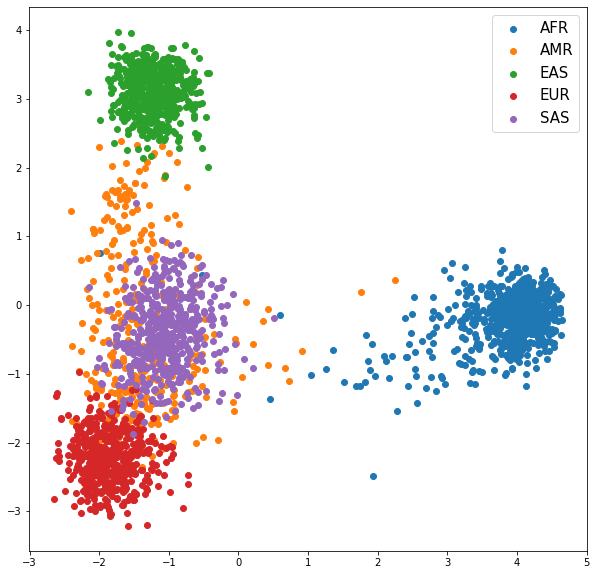

In [ ]:
plot_samples(X_pca, x_component=1, y_component=2)

# Kernel PCA

In [4]:
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

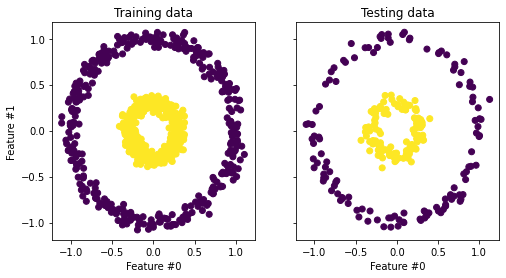

In [ ]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [ ]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=None, kernel='rbf', gamma=10, fit_inverse_transform=True, alpha=0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

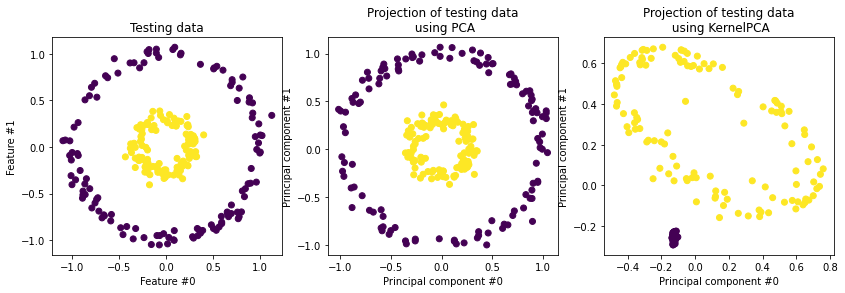

In [ ]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)

In [5]:
def plot_samples(X_pca, x_component=None, y_component=None):

    unique = np.unique(labels)

    plt.figure(figsize=(10,10));
    for (i,cla) in enumerate(set(labels)):

        xc = [p for (j,p) in enumerate(X_pca[:, x_component-1]) if labels[j]==cla]
        yc = [p for (j,p) in enumerate(X_pca[:, y_component-1]) if labels[j]==cla]

        plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])
    plt.legend(prop={'size': 15})

    #plt.title('Projection of 1000 Genomes Samples\ninto Lower Dimensional Space\nUsing 55 AIMs from Kidd et al.')
    #plt.savefig('PCA_sample_1000_gen.png', dpi=300)

In [ ]:
def plot_projection_PC_on_individuals(X_pca, PC=1):

    num_ind_in_pop = X_pca.shape[0] / len(set(labels))

    plt.figure(figsize=(8,6));
    for (i,cla) in enumerate(set(labels)):

        #xc = [p for (j,p) in enumerate(X_pca[:, PC]) if labels[j]==cla]
        #yc = [p for (j,p) in enumerate(X_pca[:, PC]) if labels[j]==cla]
        xc = np.arange(num_ind_in_pop * i, num_ind_in_pop * (i+1))
        yc = [p for (j,p) in enumerate(X_pca[:, PC-1]) if labels[j]==cla]

        plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])

    plt.xlabel("individual")
    plt.ylabel("PC"+str(PC))
    plt.legend(prop={'size': 15})

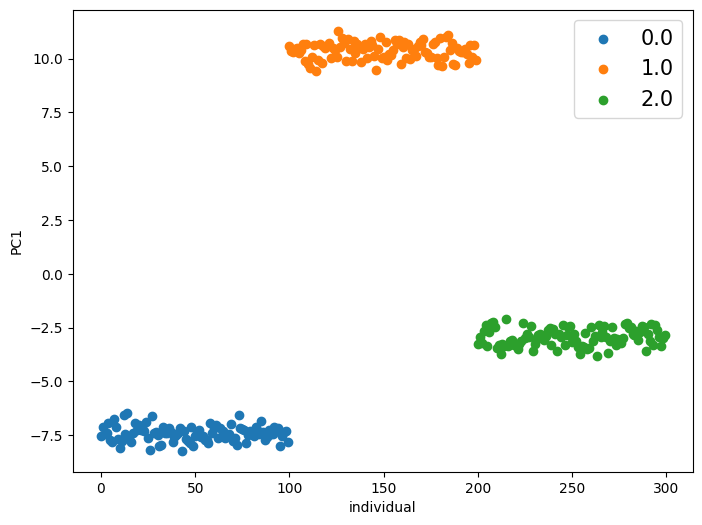

In [ ]:
plot_projection_PC_on_individuals(X_pca, 1)

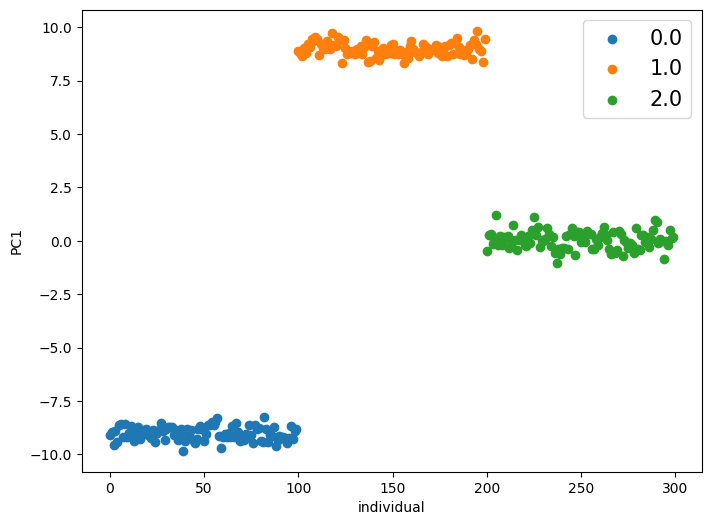

In [ ]:
plot_projection_PC_on_individuals(X_pca, 1)

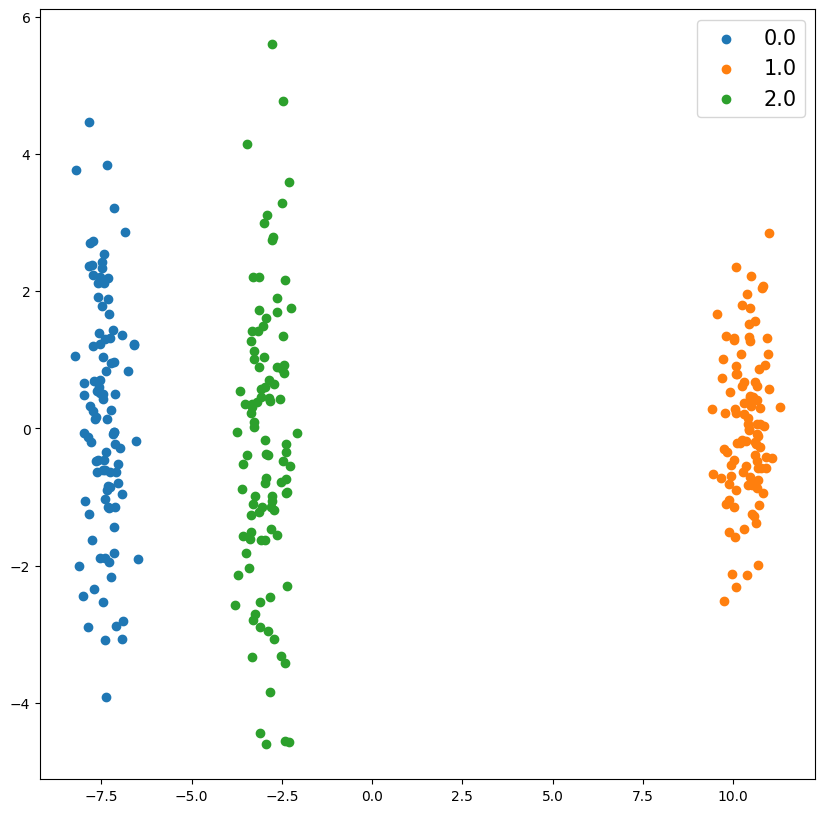

In [ ]:
plot_samples(X_pca, x_component=1, y_component=2)

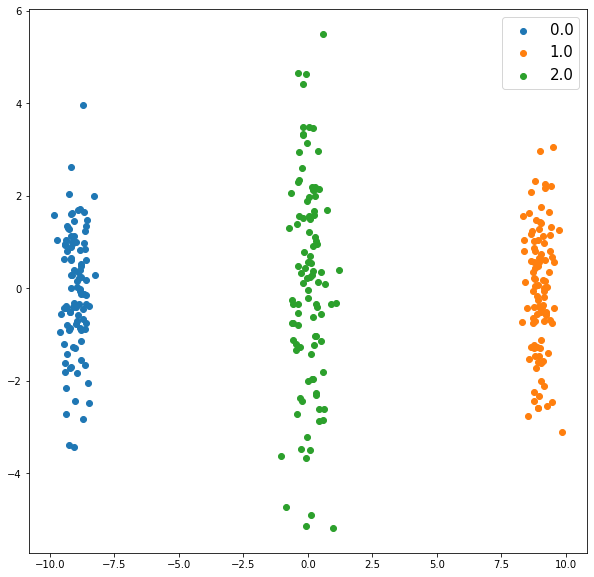

In [ ]:
X_kernel_pca = KernelPCA(n_components=None, kernel='linear', gamma=10, fit_inverse_transform=True, alpha=0.1).fit_transform(X)
plot_samples(X_kernel_pca, x_component=1, y_component=2)


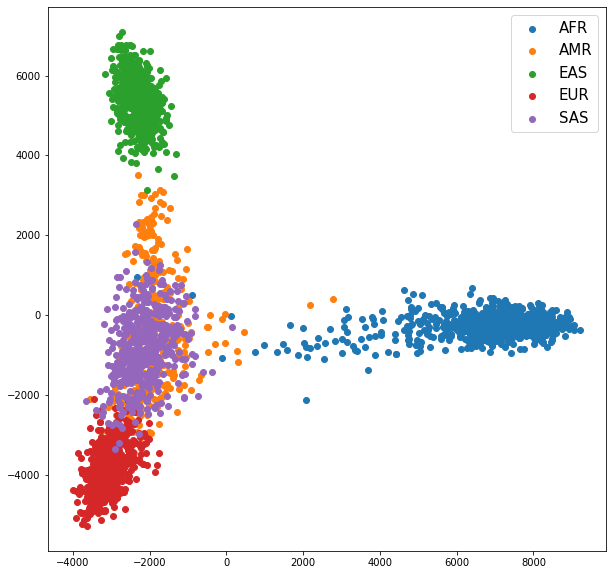

In [ ]:
X_kernel_pca = KernelPCA(n_components=None, kernel='poly', gamma=10).fit_transform(X)
plot_samples(X_kernel_pca, x_component=1, y_component=2)
plt.savefig('hyperbolic_kernel_pca_poly_1000_project_samp.png', dpi=300)


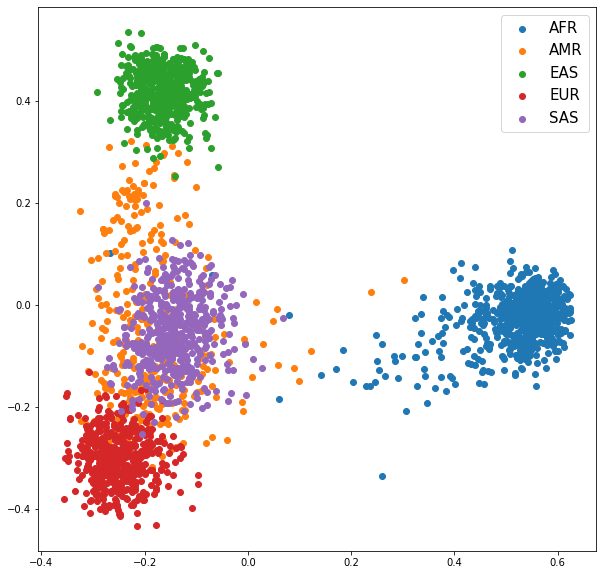

In [ ]:
X_kernel_pca_cosine = KernelPCA(n_components=None, kernel='cosine', gamma=10).fit_transform(X)
plot_samples(X_kernel_pca_cosine, x_component=1, y_component=2)
plt.savefig('hyperbolic_kernel_pca_cosine_1000_project_samp.png', dpi=300)

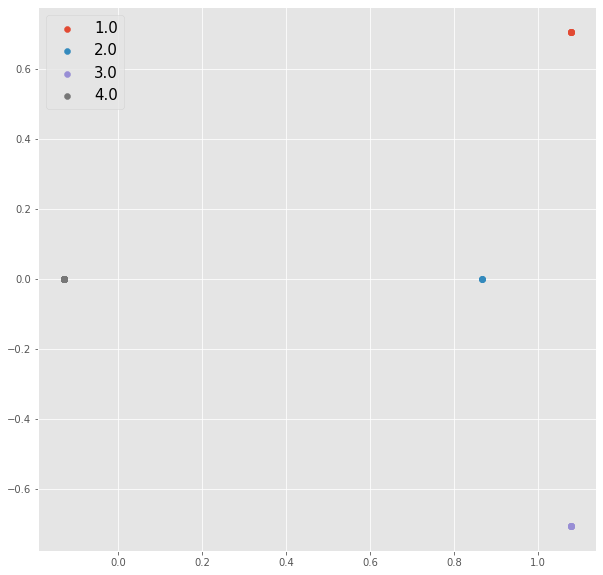

In [ ]:
X_kernel_pca = KernelPCA(n_components=None, kernel='rbf', gamma=10).fit_transform(X)
plot_samples(X_kernel_pca, x_component=1, y_component=2)
plt.savefig('hyperbolic_kernel_pca_rbf_1000_project_samp.png', dpi=300)

### Kernel PCA 3D

In [ ]:
def plot_3d_samples(zs):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    for (i,cla) in enumerate(set(labels)):
        xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
        yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]
        zc = [p for (j,p) in enumerate(zs[:, 2]) if labels[j]==cla]

        ax.scatter(xc, yc, zc, label=le.inverse_transform([cla])[0])



    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    ax.view_init(30, 90)

    plt.show()

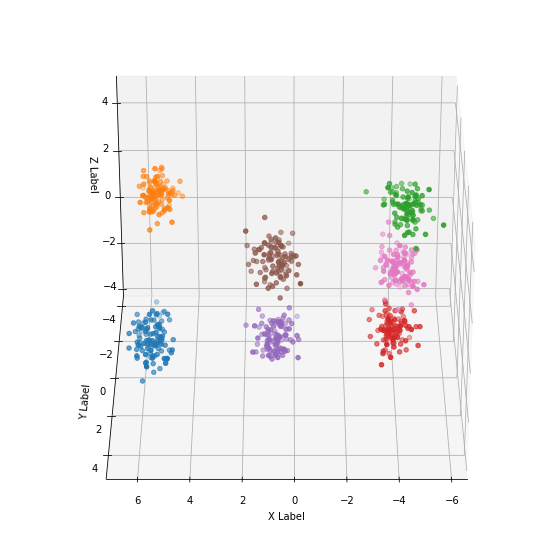

<Figure size 432x288 with 0 Axes>

In [ ]:
X_kernel_pca = KernelPCA(n_components=6, kernel='linear', gamma=10).fit_transform(X)
plot_3d_samples(X_kernel_pca)
plt.savefig('3D_kernel_pca_poly_1000_genomes_samp.png', dpi=300)

In [ ]:
X_kernel_pca
le.inverse_transform([labels[0]])

array([2.])

In [ ]:
labels[0]

2

In [ ]:
X_kernel_pca

array([[-4.90088618,  1.02535232,  4.01947702, -0.52008085,  0.66663379,
         0.97969601],
       [-3.99087738, -0.0789532 ,  0.26636063, -1.00573219,  1.82009688,
         1.06336482],
       [-4.38535177, -0.2569532 , -0.38222262, -0.42470709,  0.74254246,
         0.55108779],
       ...,
       [-4.1693749 ,  0.68863463,  3.31251939,  1.28041662, -1.08193204,
         0.57830541],
       [ 0.92066114, -1.06888995, -0.10598196,  2.23530462, -0.42826204,
         0.15358504],
       [-4.12776313, -1.0977887 , -2.94024494,  1.2567509 ,  0.13364237,
         0.17214131]])

In [ ]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X_kernel_pca, labels)

clf.centroids_

array([[ 5.44009042e+00,  3.23903660e+00, -1.07274050e-01,
        -6.18322386e-03,  4.76724956e-02, -2.61307854e-02],
       [ 5.54241479e+00, -2.86289845e+00,  1.35695790e+00,
        -4.29337402e-03,  1.54076567e-02,  6.95052792e-02],
       [-4.34594066e+00,  8.75665684e-01,  3.43970263e+00,
        -2.74870391e-02,  3.89064879e-02, -2.20519246e-02],
       [-3.98392477e+00, -7.09646166e-01, -2.80578812e+00,
        -3.55249003e-02,  1.42459067e-01,  9.20207236e-02],
       [ 7.32146534e-01,  1.23032070e+00, -1.60923790e+00,
         5.60678133e-02, -6.71345178e-02, -3.03630933e-02],
       [ 7.50232071e-01, -1.83515689e+00, -6.58926344e-01,
         2.73955359e-03, -6.99764773e-02, -8.07529334e-02],
       [-4.13501838e+00,  6.26785261e-02,  3.84565881e-01,
         1.46811704e-02, -1.07334712e-01, -2.22726613e-03]])

In [ ]:
A = clf.centroids_[0]
B = clf.centroids_[1]
C = clf.centroids_[2]
D = clf.centroids_[3]
AD = clf.centroids_[4]
BD = clf.centroids_[5]
CD = clf.centroids_[6]

dist_A_D = np.linalg.norm(A - D)
dist_A_AD = np.linalg.norm(A - AD)
dist_D_AD = np.linalg.norm(D - AD)

dist_B_D = np.linalg.norm(B - D)
dist_B_BD = np.linalg.norm(B - BD)
dist_D_BD = np.linalg.norm(D - BD)

dist_C_D = np.linalg.norm(C - D)
dist_C_CD = np.linalg.norm(C - CD)
dist_D_CD = np.linalg.norm(D - CD)

print('dist_A_D: ', dist_A_D)
print('dist_A_AD: ', dist_A_AD)
print('dist_D_AD', dist_D_AD)
print()
print('dist_B_D: ', dist_B_D)
print('dist_B_BD: ', dist_B_BD)
print('dist_D_BD', dist_D_BD)
print()
print('dist_C_D: ', dist_C_D)
print('dist_C_CD: ', dist_C_CD)
print('dist_C_AD', dist_D_CD)

dist_A_D:  10.569292373619383
dist_A_AD:  5.335976418526953
dist_D_AD 5.244409302295034

dist_B_D:  10.617613656388114
dist_B_BD:  5.302355578265238
dist_D_BD 5.325830889550739

dist_C_D:  6.455557623552628
dist_C_CD:  3.1722002708001527
dist_C_AD 3.2971917800289057


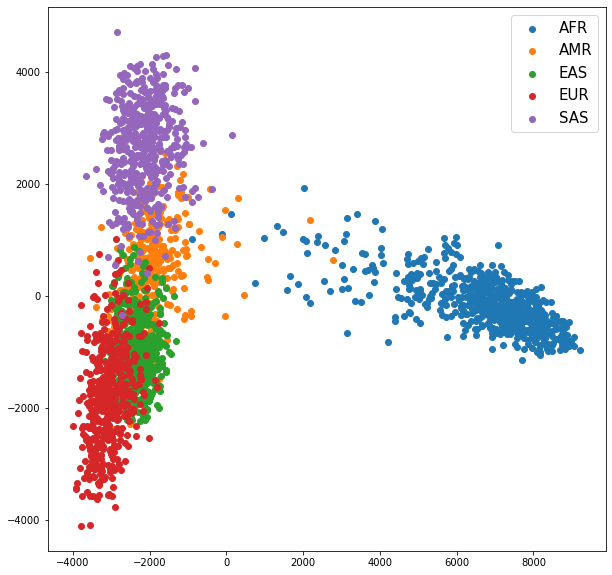

In [ ]:
plot_samples(X_kernel_pca, x_component=1, y_component=3)
plt.savefig('projection_kernel_pca_poly_ABCD_AD_BD_CD_samp.png', dpi=300)

In [ ]:
def make_pngs(zs):
    names=[]


    for angle in range(0, 360, 2):
        
        
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')

        for (i,cla) in enumerate(set(labels)):
            xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
            yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]
            zc = [p for (j,p) in enumerate(zs[:, 2]) if labels[j]==cla]
            ax.view_init(30, angle)
            ax.scatter(xc, yc, zc)

        plt.savefig('picLAB5'+str(angle)+'.png')
        names += ['picLAB5'+str(angle)+'.png'] 
        plt.close()
    
    return names

In [ ]:
names = make_pngs(X_kernel_pca)
import imageio
images = []
for filename in names:
    images.append(imageio.imread(filename))
imageio.mimsave('3d.gif', images)

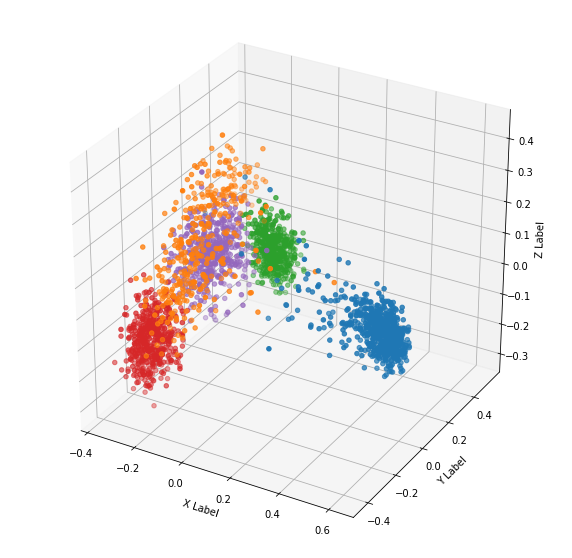

<Figure size 432x288 with 0 Axes>

In [ ]:
X_kernel_pca = KernelPCA(n_components=3, kernel='cosine', gamma=10).fit_transform(X)
plot_3d_samples(X_kernel_pca)
plt.savefig('3D_kernel_pca_cosine_ABCD_AD_BD_CD_samp.png', dpi=300)

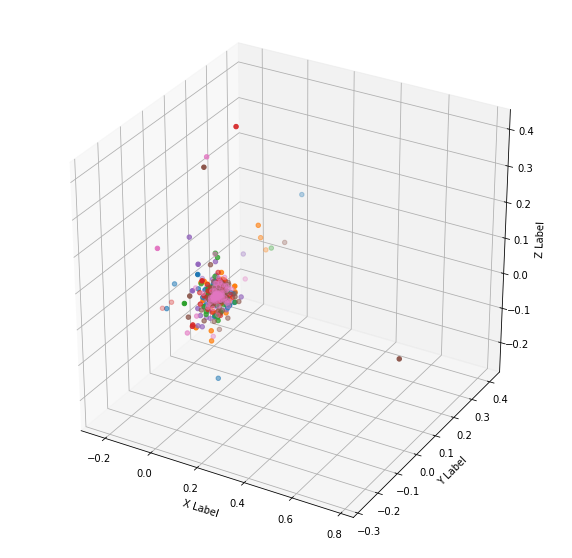

<Figure size 432x288 with 0 Axes>

In [ ]:
X_kernel_pca = KernelPCA(n_components=3, kernel='rbf', gamma=10).fit_transform(X)
plot_3d_samples(X_kernel_pca)
plt.savefig('3D_kernel_pca_cosine_ABCD_AD_BD_CD_samp.png', dpi=300)

### PCA для 300 samp, при этом PCA для source populations, а потом проекция новой на них

In [ ]:
#X = np.genfromtxt('data_simulation_10k.txt', dtype=int, delimiter=', ')

flag_drive = True
if flag_drive:
  #X = np.genfromtxt('/content/drive/MyDrive/data_simulation_10k.txt', dtype=int, delimiter=', ')#_300samp.txt', dtype=int, delimiter=', ')
  #X = np.genfromtxt('/content/drive/MyDrive/data_300_samp_10k_chr_adm_0_25.txt', dtype=int, delimiter=', ')#_300samp.txt', dtype=int, delimiter=', ')
  X = np.genfromtxt('/content/drive/MyDrive/data_300_samp_admix_30_per.txt', dtype=int, delimiter=', ')
  #X = np.genfromtxt('/content/drive/MyDrive/data_simulation_newmsprime_10k_300samp_upd.txt', dtype=int, delimiter=', ')
  #X = np.genfromtxt('/content/drive/MyDrive/data_simulation_newmsprime_10k_300samp_upd.txt', dtype=int, delimiter=', ')
  
  X = np.transpose(X)

#labels = np.genfromtxt('labels_temp.txt', dtype=int, delimiter=', ')

y = np.zeros(X.shape[0])
y[100:200] = 1
y[200:] = 2

##### Разкомментить, если использую newmsprime...
#####y[200:400] = 1
#####y[400:] = 2

adm_pop = X[200:]
X = X[:200]
y = y[:200]


le = LabelEncoder()
labels = le.fit_transform(y)

In [ ]:
X.shape

(200, 10000)

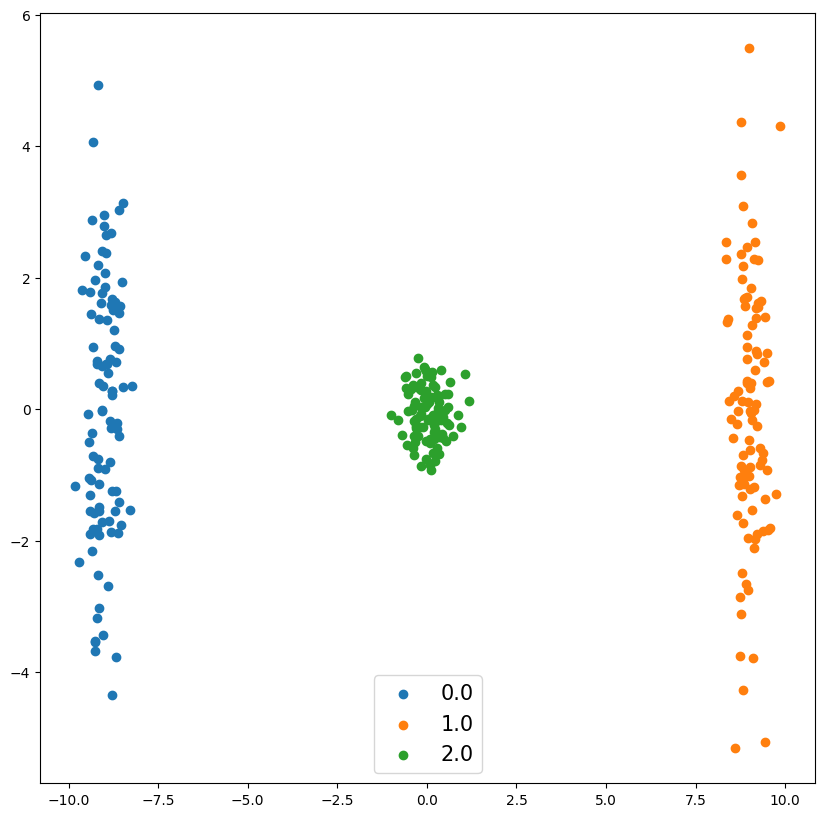

In [ ]:
pca_obj = PCA(n_components=2)
X_pca = pca_obj.fit_transform(X)
adm_pop = pca_obj.transform(adm_pop)

X_pca = np.vstack((X_pca, adm_pop))

y = np.zeros(X_pca.shape[0])
y[100:200] = 1
y[200:300] = 2


le = LabelEncoder()
labels = le.fit_transform(y)

plot_samples(X_pca, x_component=1, y_component=2)

# Получилось как в обычном PCA

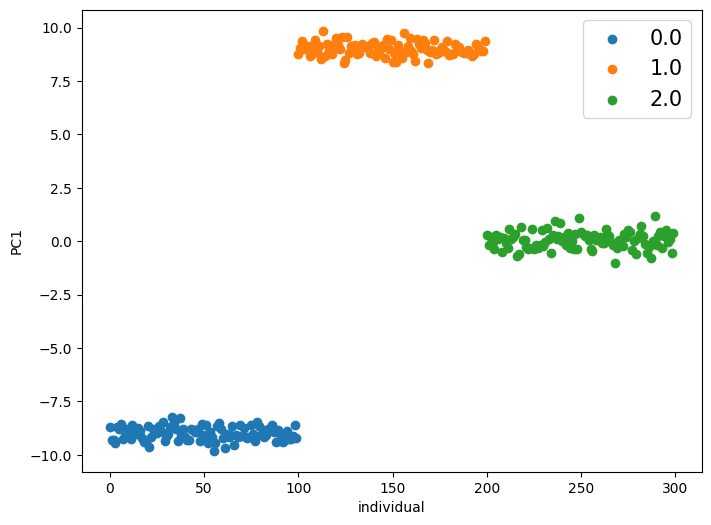

In [ ]:
plot_projection_PC_on_individuals(X_pca, 1)

### PCA для ABCD, а потом проекция AD,.. на эти PC

In [ ]:
# Вариант 08.07.21
flag_drive = True
if flag_drive:
  X = np.genfromtxt('/content/drive/MyDrive/ABCD_AD_BD_CD_second_10k_14_07_21.txt', dtype=int, delimiter=', ')
  X = np.transpose(X)

y = np.zeros(X.shape[0])
y[100:200] = 1
y[200:300] = 2
y[300:400] = 3
y[400:500] = 4
y[500:600] = 5
y[600:700] = 6
y[700:] = 7

# shuffle
#shuffle_arr = np.column_stack((X, y))
#np.random.shuffle(shuffle_arr)
#X = shuffle_arr[:, :-1]
#y = shuffle_arr[:, -1]



# ABCD под X
# AD, BD, CD - отдельно
AD = X[400:500]
BD = X[500:600]
CD = X[600:]
X = X[:400]
y = y[:400]

le = LabelEncoder()
labels = le.fit_transform(y)

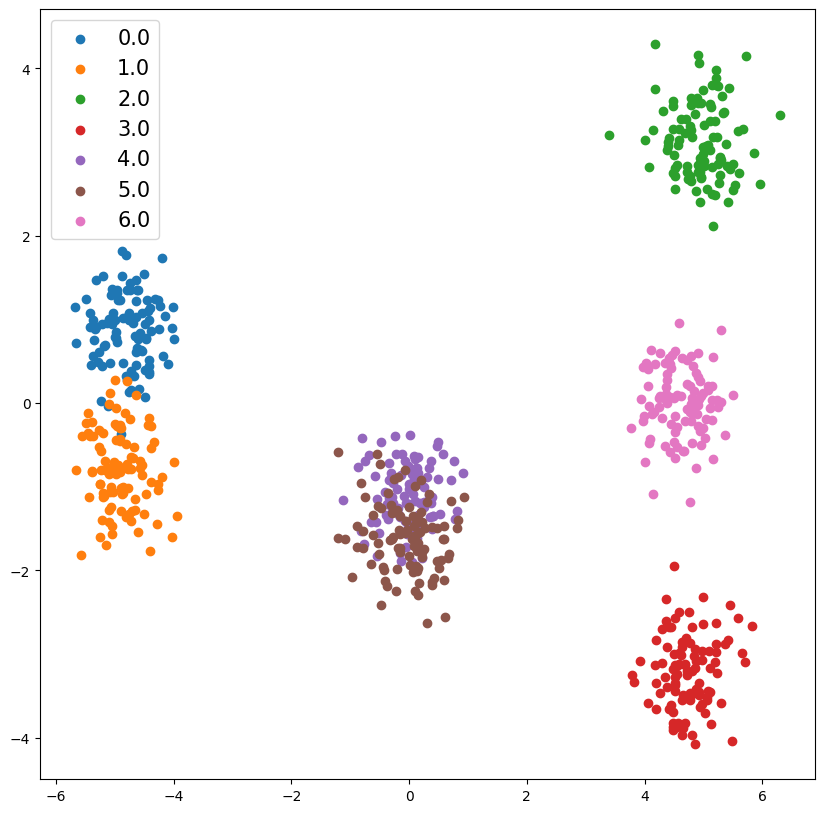

In [ ]:
kernel_pca = KernelPCA(n_components=None, kernel='linear', gamma=10, fit_inverse_transform=True, alpha=0.1)
X_kernel_pca = kernel_pca.fit_transform(X)
AD = kernel_pca.transform(AD)
BD = kernel_pca.transform(BD)
CD = kernel_pca.transform(CD)
X_kernel_pca = np.vstack((X_kernel_pca, AD, BD, CD))

y = np.zeros(X_kernel_pca.shape[0])
y[100:200] = 1
y[200:300] = 2
y[300:400] = 3
y[400:500] = 4
y[500:600] = 5
y[600:700] = 6

le = LabelEncoder()
labels = le.fit_transform(y)

plot_samples(X_kernel_pca, x_component=1, y_component=2)

# Получилось как в обычном PCA

# Isomap

In [ ]:
from sklearn import manifold

In [ ]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

In [ ]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
X_isomap = isomap.fit_transform(X)

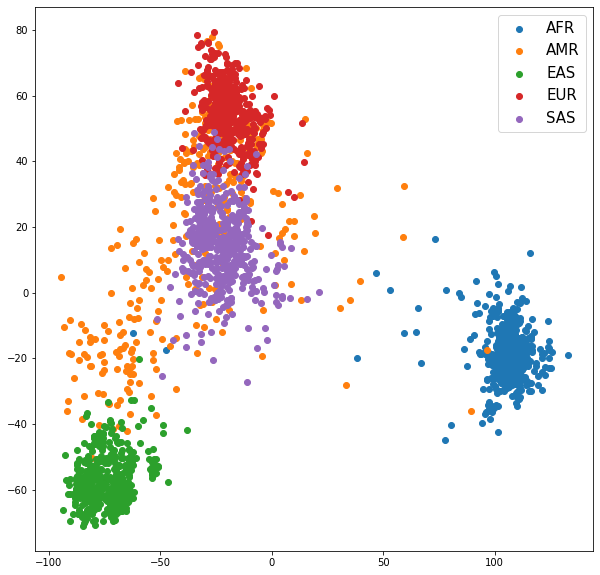

In [ ]:
plot_samples(X_isomap, x_component=1, y_component=2) # Случай для 300 (600) samp плохой
plt.savefig('hyperbolic_isomap_300_samp.png', dpi=300)

In [ ]:
n_neighbors = 100  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

In [ ]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
X_isomap = isomap.fit_transform(X)

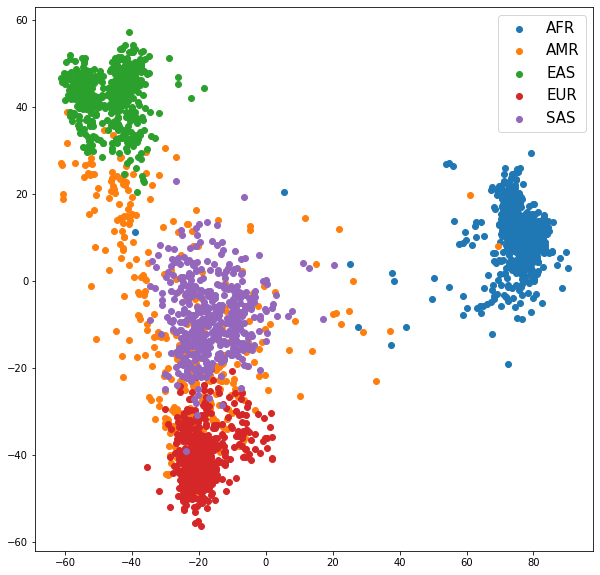

In [ ]:
plot_samples(X_isomap, x_component=1, y_component=2)
plt.savefig('hyperbolic_isomap_1000_project_samp.png', dpi=300)

### Isomap 3D

In [ ]:
n_neighbors = 150  # neighborhood which is used to recover the locally linear structure
n_components = 3  # number of coordinates for the manifold

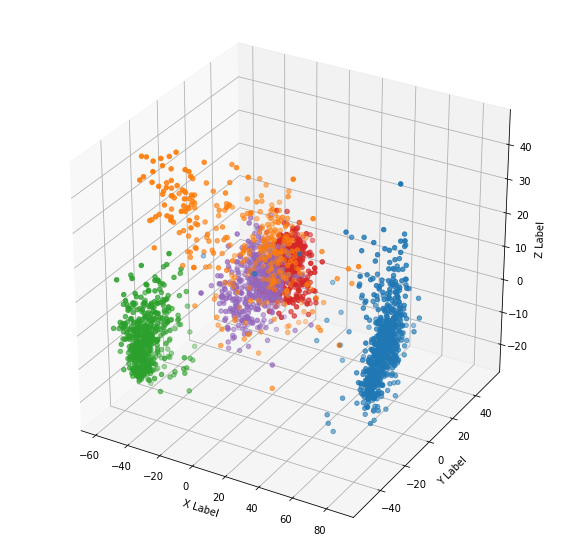

<Figure size 432x288 with 0 Axes>

In [ ]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
X_isomap = isomap.fit_transform(X)
plot_3d_samples(X_isomap)
plt.savefig('3D_isomap_ABCD_samp.png', dpi=300)

In [ ]:
names = make_pngs(X_isomap)
import imageio
images = []
for filename in names:
    images.append(imageio.imread(filename))
imageio.mimsave('3d.gif', images)

# Multi-dimensional scaling (MDS)

In [ ]:
from numpy.random import RandomState

In [ ]:
rng = RandomState(0)
md_scaling = manifold.MDS(
    n_components=n_components, max_iter=500, n_init=4, random_state=rng
)
X_md_scaling = md_scaling.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


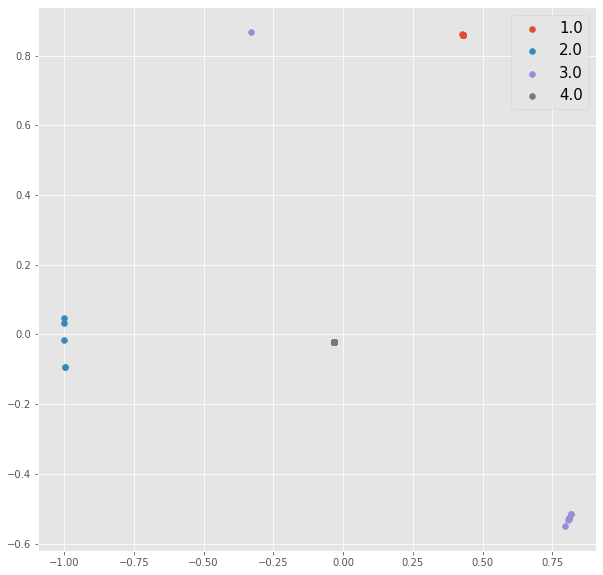

In [ ]:
plot_samples(X_md_scaling, x_component=1, y_component=2) # для ABCDEF
plt.savefig('hyperbolic_mds_1000_project_samp.png', dpi=300)

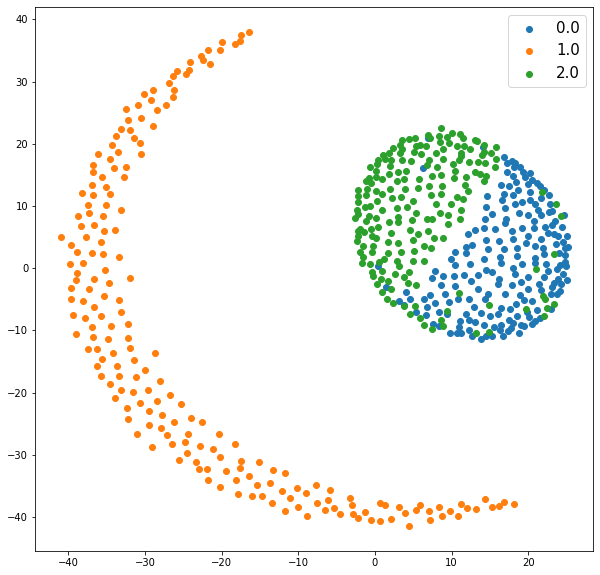

In [ ]:
rng = RandomState(0)
md_scaling = manifold.MDS(
    n_components=n_components, max_iter=500, n_init=8, random_state=rng
)
X_md_scaling = md_scaling.fit_transform(X)

plot_samples(X_md_scaling, x_component=1, y_component=2) # для 300 samp

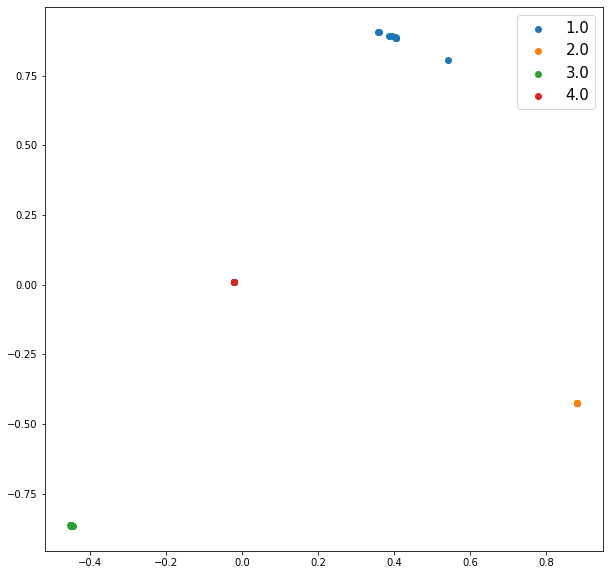

In [ ]:
rng = RandomState(0)
md_scaling = manifold.MDS(
    n_components=n_components, max_iter=500, n_init=8, random_state=rng
)
X_md_scaling = md_scaling.fit_transform(X)

plot_samples(X_md_scaling, x_component=1, y_component=2) # для треугольника из статьи

### MDS 3D

In [ ]:
rng = RandomState(0)
md_scaling = manifold.MDS(
    n_components=n_components, max_iter=500, n_init=4, random_state=rng
)
X_md_scaling = md_scaling.fit_transform(X)

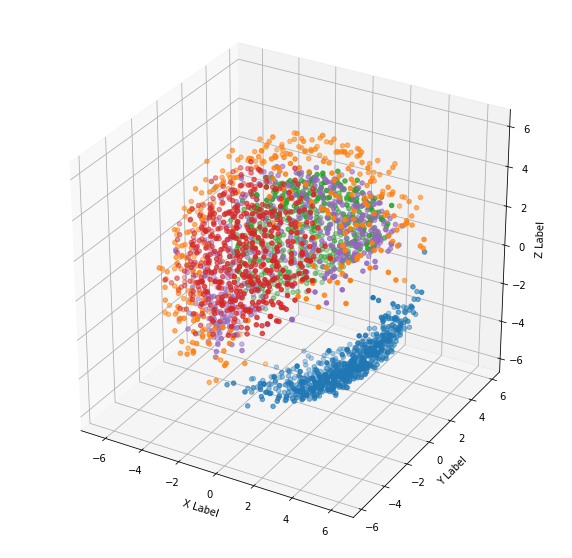

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_3d_samples(X_md_scaling)
plt.savefig('3D_MDS_ABCD_samp.png', dpi=300)

In [ ]:
names = make_pngs(X_isomap)
import imageio
images = []
for filename in names:
    images.append(imageio.imread(filename))
imageio.mimsave('MDS_3d_ABCD.gif', images)

# Locally-linear embedding (LLE)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

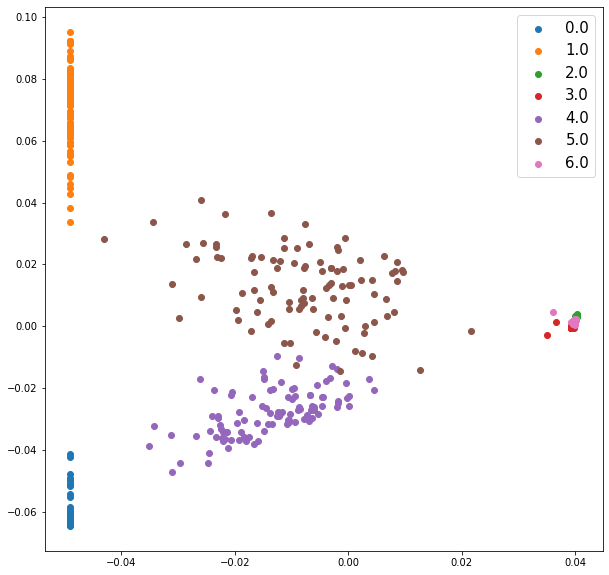

In [ ]:
lle = manifold.LocallyLinearEmbedding(method="standard", n_neighbors=20, n_components=2)
X_lle = lle.fit_transform(X)
plot_samples(X_lle, x_component=1, y_component=2)

In [ ]:
lle = manifold.LocallyLinearEmbedding(method="hessian", n_neighbors=20, n_components=2)
X_lle = lle.fit_transform(X)
plot_samples(X_lle, x_component=1, y_component=2)

ValueError: ignored

# TSNE (with initializing pca)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# perplexity по умолчанию = 30, при уменьшении сильный разброс, при увеличении популяции плотнее группируются
# для 300 samp perplexity = 80, lr = 200
# perplexity = 80, lr=700 для ABCD
X_embeded = TSNE(n_components=2, init='pca', learning_rate=700, perplexity=80).fit_transform(X)

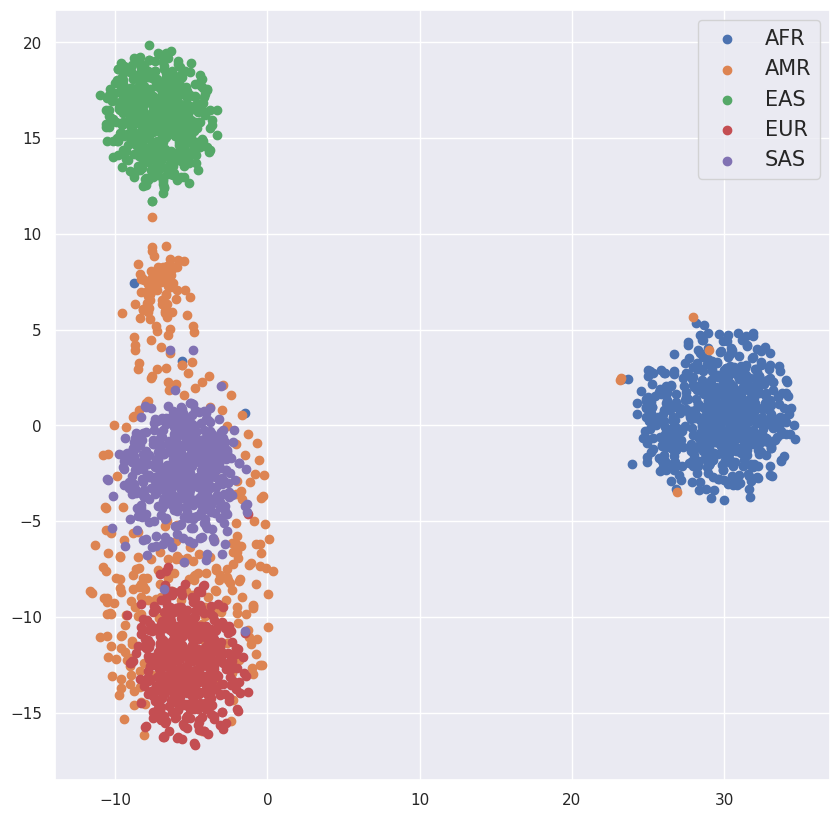

In [ ]:
plot_samples(X_embeded, x_component=1, y_component=2)
plt.savefig('tsne_1000_samp_upd.png', dpi=300)

In [ ]:
plt.savefig('tsne_ABCD_samp.png', dpi=300)

<Figure size 432x288 with 0 Axes>

# VAE

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable

In [ ]:
representation_size = 2 # ЗАМЕНИТЬ НА 2
input_size = X.shape[1]
n_samples = X.shape[0]
batch_size = 16

In [ ]:
n_samples_per_batch = n_samples//input_size

x = X.copy()
#x = X.values
x = x.astype(np.float32)

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.en1 = nn.Linear(input_size, 200)
        self.en_mu = nn.Linear(200, representation_size)
        self.en_std = nn.Linear(200, representation_size)
        self.de1 = nn.Linear(representation_size, 200)
        self.de2 = nn.Linear(200, input_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def encode(self, x):
        h1 = self.relu(self.en1(x))
        return self.en_mu(h1), self.en_std(h1)
    
    def decode(self, z):
        
        h2 = self.relu(self.de1(z))
        return self.sigmoid(self.de2(h2))
    
    def reparam(self, mu, logvar):
        """Reparameterisation trick to sample z values."""
        
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
            
    
    def forward(self, x):
        """Takes a batch of samples, encodes them, and then decodes them again to compare."""
        mu, logvar = self.encode(x.view(-1, input_size))
        z = self.reparam(mu, logvar)
        return self.decode(z), mu, logvar
    
    def loss(self, reconstruction, x, mu, logvar):
        """ELBO assuming entries of x are binary variables, with closed form KLD."""
        
        bce = torch.nn.functional.binary_cross_entropy(reconstruction, x.view(-1, input_size))
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        # Normalise by same number of elements as in reconstruction
        KLD /= x.view(-1, input_size).data.shape[0] * input_size

        return bce + KLD
    
    def get_z(self, x):
        """Encode a batch of data points, x, into their z representations."""
        
        mu, logvar = self.encode(x.view(-1, input_size))
        return self.reparam(mu, logvar)

In [ ]:
model = VAE()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
def train(epoch, batches_per_epoch = 64, log_interval=500):
    model.train()
    
    ind = np.arange(x.shape[0])
    for i in range(batches_per_epoch):
        #print('dsag', x[['rs3737576_0']])
        #print(np.random.choice(ind, size=batch_size))
        data = torch.from_numpy(x[np.random.choice(ind, size=batch_size)])
        data = Variable(data, requires_grad=False)

        # Зануление градиента
        optimizer.zero_grad()

        # Предсказание и loss
        recon_batch, mu, logvar = model(data)
        loss = model.loss(recon_batch, data, mu, logvar)
        
        # backward
        loss.backward()

        # Обновление весов
        optimizer.step()

        if (i % log_interval == 0) and (epoch % 5 ==0):
            #Print progress
            print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
                epoch, i * batch_size, batch_size*batches_per_epoch,
                loss.data / len(data)), 'len_data = ', len(data))

    print('====> Epoch: {} done!'.format(epoch))

In [ ]:
%%time
for epoch in range(1, 16):
    train(epoch)
    

====> Epoch: 1 done!
====> Epoch: 2 done!
====> Epoch: 3 done!
====> Epoch: 4 done!
Train Epoch: 5 [0/1024]	Loss: 0.009792 len_data =  16
====> Epoch: 5 done!
====> Epoch: 6 done!
====> Epoch: 7 done!
====> Epoch: 8 done!
====> Epoch: 9 done!
Train Epoch: 10 [0/1024]	Loss: 0.009996 len_data =  16
====> Epoch: 10 done!
====> Epoch: 11 done!
====> Epoch: 12 done!
====> Epoch: 13 done!
====> Epoch: 14 done!
Train Epoch: 15 [0/1024]	Loss: 0.009721 len_data =  16
====> Epoch: 15 done!
CPU times: user 1min 3s, sys: 27.1 ms, total: 1min 3s
Wall time: 1min 4s


In [ ]:
Var = Variable(torch.from_numpy(x), requires_grad=False)
model.train()
zs = model.get_z(Var).data.numpy()

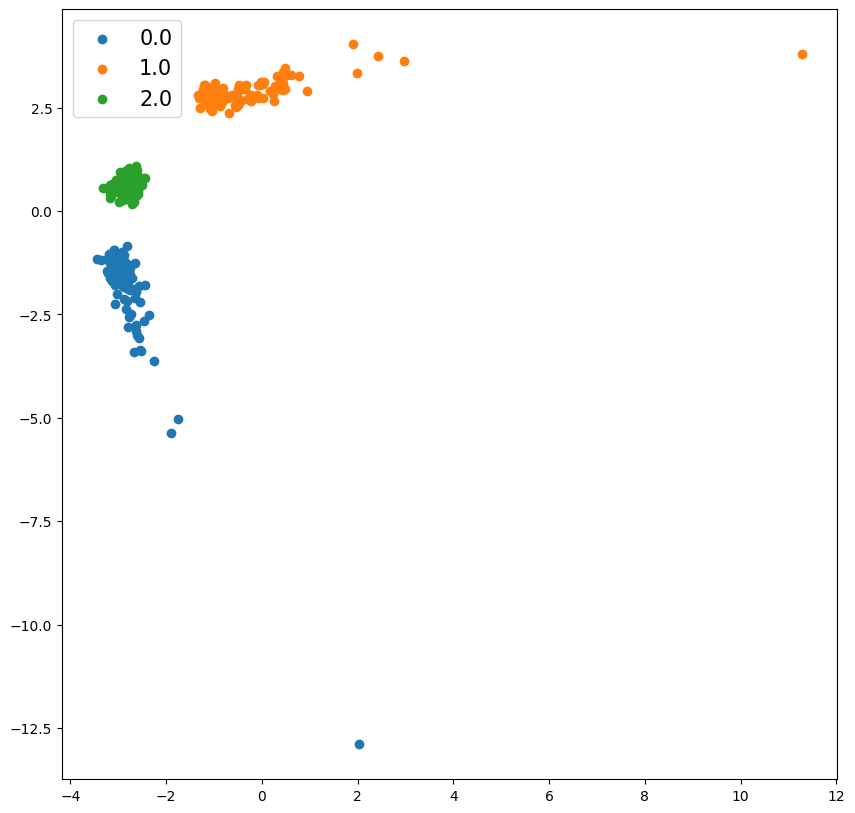

In [ ]:
plt.figure(figsize=(10,10))

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]



  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])

plt.legend(prop={'size': 15})
plt.savefig('vae_plot_30k.png', dpi=300)

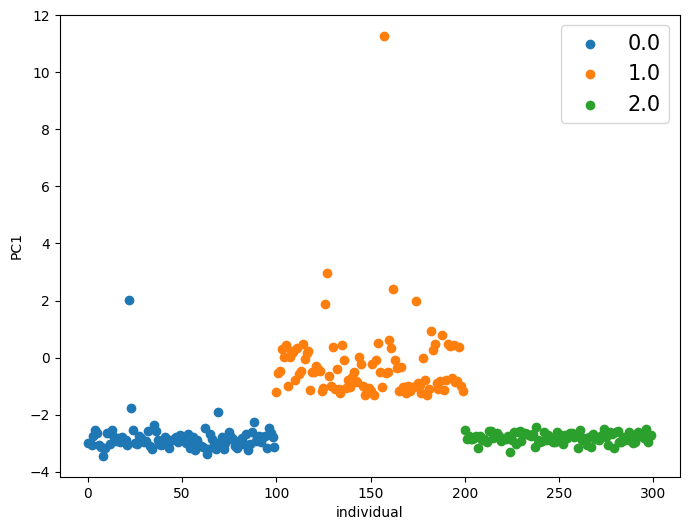

In [ ]:
plot_projection_PC_on_individuals(zs, 1)

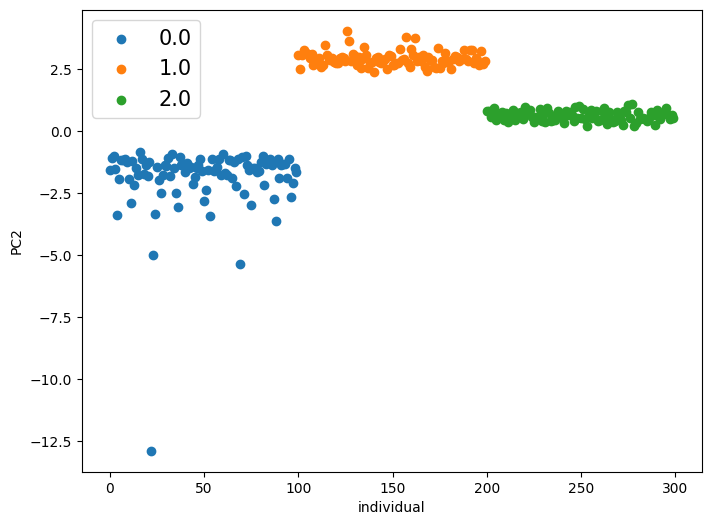

In [ ]:
plot_projection_PC_on_individuals(zs, 2)

### VAE 300samp обучение на source, проекция admix

In [ ]:
# Для эксперимента, когда обучили на A,B,C,D и прогнали AD,BD,CD через обученную сеть
Var = Variable(torch.from_numpy(adm_pop), requires_grad=False)
model.eval()
adm_pop_vae = model.get_z(Var.float()).data.numpy()


zs_temp = np.vstack((zs, adm_pop_vae))

In [ ]:
zs_temp.shape

(1200, 2)

In [ ]:
y = np.zeros(300)
y[100:200] = 1
y[200:300] = 2


le = LabelEncoder()
labels = le.fit_transform(y)

In [ ]:
set(labels)

{0, 1}

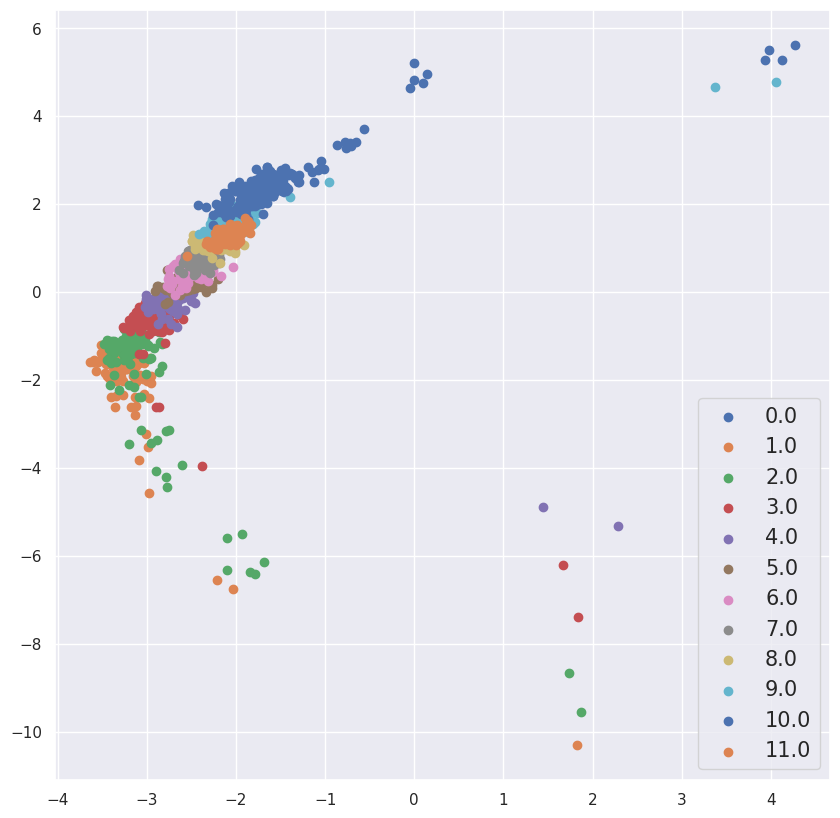

In [ ]:
plt.figure(figsize=(10,10))

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs_temp[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs_temp[:, 1]) if labels[j]==cla]



  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])

plt.legend(prop={'size': 15})
plt.savefig('vae_plot_30k.png', dpi=300)

In [ ]:
zs.shape

(300, 2)

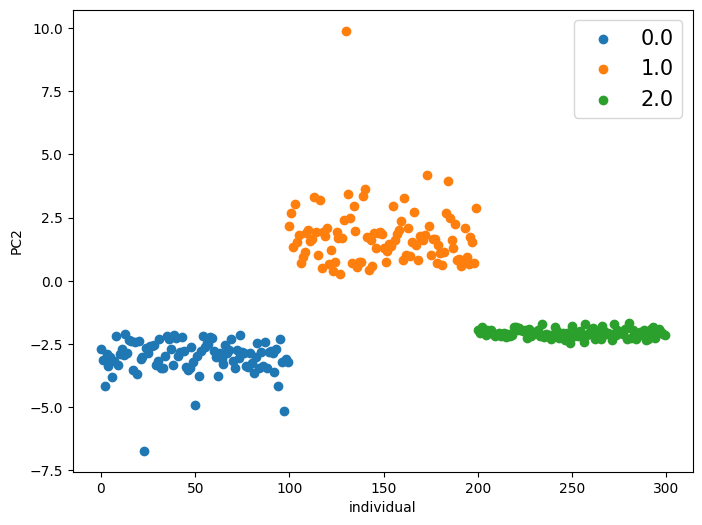

In [ ]:
plot_projection_PC_on_individuals(zs, 2)

In [ ]:
y = np.zeros(semi_sup_pop.shape[0] + len(adm_pop))

left_border = 0
for i, right_border in enumerate(np.arange(100, semi_sup_pop.shape[0]+ len(adm_pop)+1, step=SIZE_POP)):
    y[left_border: right_border] = i
    left_border = right_border

le = LabelEncoder()
labels = le.fit_transform(y)

In [ ]:
adm_pop.shape

(100, 10000)

## Semi-supervised VAE

### 300 samp

Случай для 300 samp:  
1. Обучение VAE на двух базовых популяциях
2. Генерирование перемешанной популяции (для разных alpha) через msprime
3. Генерирование вручную перемешанной популяции
4. Прогон сгенерированных популяций через VAE
5. Возможно ли их классифицировать?

In [ ]:
# К данному этапу обучен VAE на 2х базовых популяциях
alpha = 0.6
pop_from_snp = np.zeros((adm_pop.shape[0], X.shape[1]))
#for position, _ in enumerate(X.shape[1]):
for step in tqdm.tqdm(range(100)):
    # Выбираем по случайному сэмплу из двух базовых популяций
    # рандомно с вероятностью alpha Выбираем SNP
    size_one_pop = int(X.shape[0]/2)
    first_sample = np.random.randint(low=0, high=size_one_pop)
    second_sample = np.random.randint(low=size_one_pop, high=X.shape[0])

    for position in range(X.shape[1]):
        #what_snp = np.random.randint(2)
        what_snp = np.random.rand()
        if what_snp < alpha:
            pop_from_snp[step, position] = X[first_sample][position]
        else:
            pop_from_snp[step, position] = X[second_sample][position]

100%|██████████| 100/100 [00:01<00:00, 70.39it/s]


In [ ]:
np.random.uniform(1)

1.0

In [ ]:
np.random.rand()

0.27655274010839315

In [ ]:
adm_pop.shape

(100, 10000)

In [ ]:
pop_from_snp.shape

(100, 10000)

In [ ]:
semi_sup_pop = np.vstack((adm_pop, pop_from_snp))

In [ ]:
Var = Variable(torch.from_numpy(semi_sup_pop), requires_grad=False)
model.eval()
adm_pop_vae = model.get_z(Var.float()).data.numpy()

zs = adm_pop_vae
#zs = np.vstack((zs, adm_pop_vae))

In [ ]:
y_semi_sup = np.zeros(200)
y_semi_sup[100:200] = 1

le = LabelEncoder()
labels = le.fit_transform(y_semi_sup)

In [ ]:
zs.shape

(200, 2)

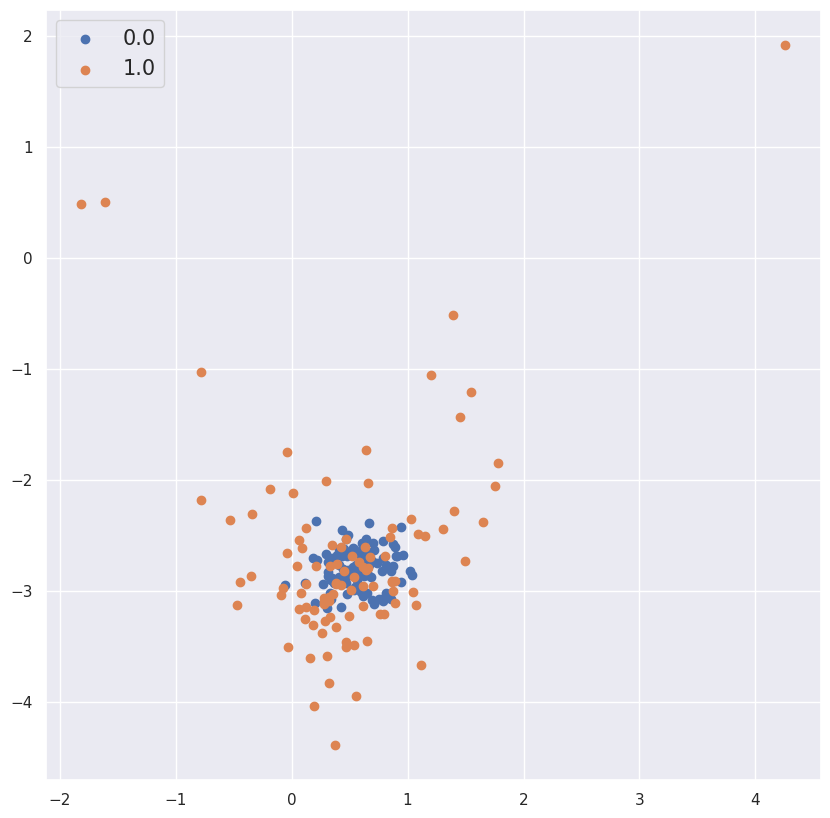

In [ ]:
plt.figure(figsize=(10,10))

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]



  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])

#plt.xlim([-2, 4])
#plt.ylim([-4.5, 4])
plt.legend(prop={'size': 15})
plt.savefig('vae_plot_30k.png', dpi=300)

Когда alpha близко к 0.1 и 0.9, то когда генерим с помощью SNP, то нет смешанной популяции, только базовые.  
Когда alpha близко к 0.5, то 3 популяции.  
т.е. всегда будут базовые популяции, т.е. вряд ли разделим идеально перемешанные популяции.

### Генерируем метисовые популяции с помощью SNP и классифицируем данные из msprime

In [ ]:
pop_from_snp.shape

(900, 10000)

In [ ]:
# К данному этапу обучен VAE на 2х базовых популяциях
alpha_arr = np.arange(0.1, 1.0, step=0.1)
SIZE_POP = 100
pop_from_snp = np.zeros((SIZE_POP * len(alpha_arr), X.shape[1]))
#for position, _ in enumerate(X.shape[1]):

for n_pop, alpha in enumerate(alpha_arr):
    print(alpha)
    for step in range(SIZE_POP):
        # Выбираем по случайному сэмплу из двух базовых популяций
        # рандомно с вероятностью alpha Выбираем SNP
        size_one_pop = int(X.shape[0]/2)
        first_sample = np.random.randint(low=0, high=size_one_pop)
        second_sample = np.random.randint(low=size_one_pop, high=X.shape[0])

        for position in range(X.shape[1]):
            #what_snp = np.random.randint(2)
            what_snp = np.random.rand()
            #if n_pop*SIZE_POP + position == 10000:
                #print(alpha, step, position)
            #print(step)
            if what_snp > alpha:
                pop_from_snp[n_pop*SIZE_POP + step, position] = X[first_sample][position]  # n_pop*SIZE_POP + step
            else:
                pop_from_snp[n_pop*SIZE_POP + step, position] = X[second_sample][position]

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


In [ ]:
# Объединяем базовые популяции и сгенерированные с помощью SNP
semi_sup_pop = np.vstack((X, pop_from_snp))

In [ ]:
semi_sup_pop.shape

(1100, 10000)

In [ ]:
np.arange(100, semi_sup_pop.shape[0]+1, step=SIZE_POP)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100])

In [ ]:
y_semi_sup = np.zeros(semi_sup_pop.shape[0])

left_border = 0
for i, right_border in enumerate(np.arange(100, semi_sup_pop.shape[0]+1, step=SIZE_POP)):
    y_semi_sup[left_border: right_border] = i
    left_border = right_border



In [ ]:
le = LabelEncoder()
labels = le.fit_transform(y_semi_sup)

Теперь обучаем PCA на базовых и сгенерированных с помощью SNP

In [ ]:
pca_obj= PCA(n_components=2)
zs = pca_obj.fit_transform(semi_sup_pop)

In [ ]:
zs.shape

(1100, 2)

 Теперь обучаем VAE на базовых и сгенерированных с помощью SNP

In [ ]:
representation_size = 2 # ЗАМЕНИТЬ НА 2
input_size = semi_sup_pop.shape[1]
n_samples = semi_sup_pop.shape[0]
batch_size = 32

In [ ]:
n_samples_per_batch = n_samples//input_size

x = semi_sup_pop.copy()
#x = X.values
x = x.astype(np.float32)

In [ ]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.en1 = nn.Linear(input_size, 200)
        self.en_mu = nn.Linear(200, representation_size)
        self.en_std = nn.Linear(200, representation_size)
        self.de1 = nn.Linear(representation_size, 200)
        self.de2 = nn.Linear(200, input_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def encode(self, x):
        h1 = self.relu(self.en1(x))
        return self.en_mu(h1), self.en_std(h1)
    
    def decode(self, z):
        
        h2 = self.relu(self.de1(z))
        return self.sigmoid(self.de2(h2))
    
    def reparam(self, mu, logvar):
        """Reparameterisation trick to sample z values."""
        
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
            
    
    def forward(self, x):
        """Takes a batch of samples, encodes them, and then decodes them again to compare."""
        mu, logvar = self.encode(x.view(-1, input_size))
        z = self.reparam(mu, logvar)
        return self.decode(z), mu, logvar
    
    def loss(self, reconstruction, x, mu, logvar):
        """ELBO assuming entries of x are binary variables, with closed form KLD."""
        
        bce = torch.nn.functional.binary_cross_entropy(reconstruction, x.view(-1, input_size))
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        # Normalise by same number of elements as in reconstruction
        KLD /= x.view(-1, input_size).data.shape[0] * input_size

        return bce + KLD
    
    def get_z(self, x):
        """Encode a batch of data points, x, into their z representations."""
        
        mu, logvar = self.encode(x.view(-1, input_size))
        return self.reparam(mu, logvar)

In [ ]:
model = VAE()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
def train(epoch, batches_per_epoch = 64, log_interval=500):
    model.train()
    
    ind = np.arange(x.shape[0])
    for i in range(batches_per_epoch):
        #print('dsag', x[['rs3737576_0']])
        #print(np.random.choice(ind, size=batch_size))
        data = torch.from_numpy(x[np.random.choice(ind, size=batch_size)])
        data = Variable(data, requires_grad=False)

        # Зануление градиента
        optimizer.zero_grad()

        # Предсказание и loss
        recon_batch, mu, logvar = model(data)
        loss = model.loss(recon_batch, data, mu, logvar)
        
        # backward
        loss.backward()

        # Обновление весов
        optimizer.step()

        if (i % log_interval == 0) and (epoch % 5 ==0):
            #Print progress
            print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
                epoch, i * batch_size, batch_size*batches_per_epoch,
                loss.data / len(data)), 'len_data = ', len(data))

    print('====> Epoch: {} done!'.format(epoch))

In [ ]:
%%time
for epoch in range(1, 16):
    train(epoch)
    

====> Epoch: 1 done!
====> Epoch: 2 done!
====> Epoch: 3 done!
====> Epoch: 4 done!
Train Epoch: 5 [0/2048]	Loss: 0.005756 len_data =  32
====> Epoch: 5 done!
====> Epoch: 6 done!
====> Epoch: 7 done!
====> Epoch: 8 done!
====> Epoch: 9 done!
Train Epoch: 10 [0/2048]	Loss: 0.005895 len_data =  32
====> Epoch: 10 done!
====> Epoch: 11 done!
====> Epoch: 12 done!
====> Epoch: 13 done!
====> Epoch: 14 done!
Train Epoch: 15 [0/2048]	Loss: 0.005860 len_data =  32
====> Epoch: 15 done!
CPU times: user 1min 4s, sys: 95 ms, total: 1min 4s
Wall time: 1min 4s


In [ ]:
Var = Variable(torch.from_numpy(x), requires_grad=False)
model.train()
zs = model.get_z(Var).data.numpy()

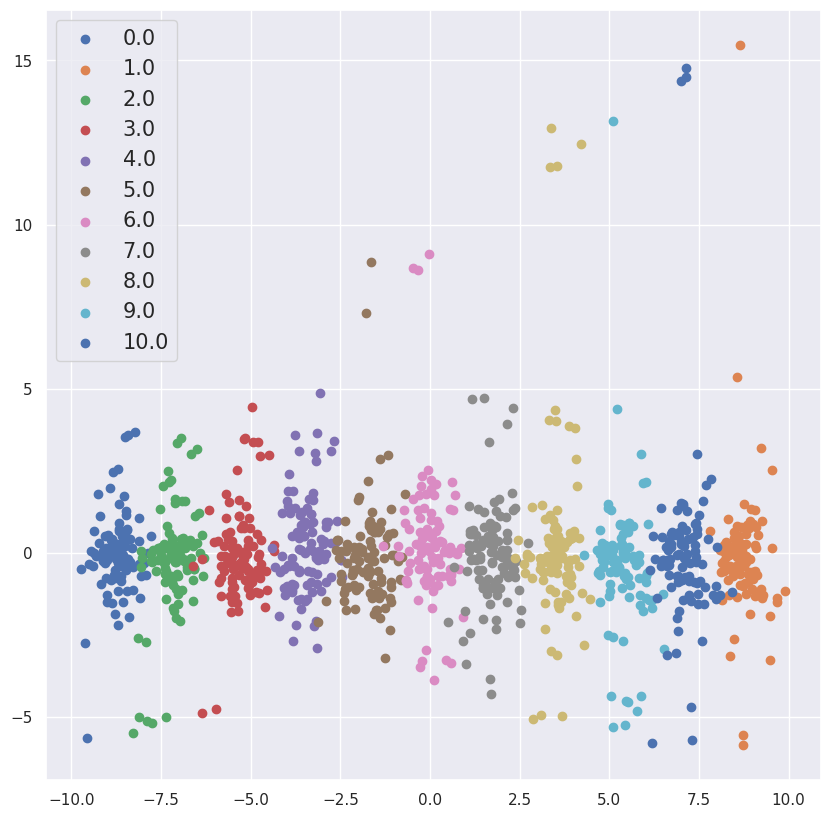

In [ ]:
plt.figure(figsize=(10,10))

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]



  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])

#plt.xlim([-2, 4])
#plt.ylim([-4.5, 4])
plt.legend(prop={'size': 15})
plt.savefig('vae_plot_30k.png', dpi=300)

In [ ]:
Var = Variable(torch.from_numpy(adm_pop), requires_grad=False)
model.eval()
adm_pop_vae = model.get_z(Var.float()).data.numpy()


zs_temp = np.vstack((zs, adm_pop_vae))

In [ ]:
# Случай для PCA
adm_pop_pca = pca_obj.transform(adm_pop)

zs_temp = np.vstack((zs, adm_pop_pca))

In [ ]:
y = np.zeros(semi_sup_pop.shape[0] + len(adm_pop))

left_border = 0
for i, right_border in enumerate(np.arange(100, semi_sup_pop.shape[0]+ len(adm_pop)+1, step=SIZE_POP)):
    y[left_border: right_border] = i
    left_border = right_border

le = LabelEncoder()
labels = le.fit_transform(y)

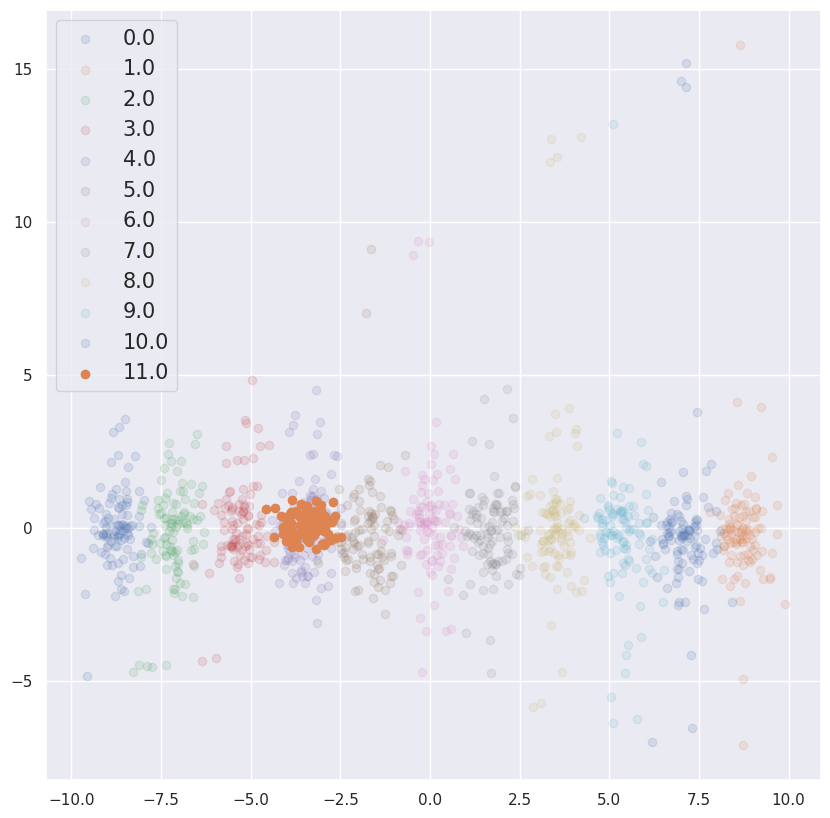

In [ ]:
plt.figure(figsize=(10,10))

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs_temp[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs_temp[:, 1]) if labels[j]==cla]


  al = None
  if cla == max(labels):
    al = 1.0
  else:
    al = 0.15
  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0], alpha=al)

plt.legend(prop={'size': 15})
plt.savefig('vae_plot_30k.png', dpi=300)

#### Определение класса истинной смешанной популяции из msprime

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [ ]:
zs.shape

(1100, 2)

In [ ]:
temp_labels = labels[:-100]

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(zs, temp_labels)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = neigh.predict(zs_temp[-100:])
predictions

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
Counter(predictions)

Counter({4: 96, 5: 2, 3: 2})

# Когда базовые популяции имеют разный размер

In [14]:
#X = np.genfromtxt('data_simulation_10k.txt', dtype=int, delimiter=', ')

flag_drive = True
if flag_drive:
  X = np.genfromtxt('/content/drive/MyDrive/data_simulation_10k_base_500.txt', dtype=int, delimiter=', ')#_300samp.txt', dtype=int, delimiter=', ')
  #X = np.genfromtxt('/content/drive/MyDrive/data_300_samp_10k_chr_adm_0_25.txt', dtype=int, delimiter=', ')#_300samp.txt', dtype=int, delimiter=', ')
  #X = np.genfromtxt('/content/drive/MyDrive/data_simulation_newmsprime_10k_300samp_upd.txt', dtype=int, delimiter=', ')
  #X = np.genfromtxt('/content/drive/MyDrive/data_simulation_newmsprime_10k_300samp_upd.txt', dtype=int, delimiter=', ')
  
  X = np.transpose(X)

#labels = np.genfromtxt('labels_temp.txt', dtype=int, delimiter=', ')

y = np.zeros(X.shape[0])
y[500:600] = 1
y[600:] = 2

##### Разкомментить, если использую newmsprime...
#####y[200:400] = 1
#####y[400:] = 2

# shuffle
#shuffle_arr = np.column_stack((X, y))
#np.random.shuffle(shuffle_arr)
#X = shuffle_arr[:, :-1]
#y = shuffle_arr[:, -1]

adm_pop = X[600:]
X = X[:600]
y = y[:600]

le = LabelEncoder()
labels = le.fit_transform(y)

In [15]:
X_pca = PCA(n_components=2).fit_transform(X)

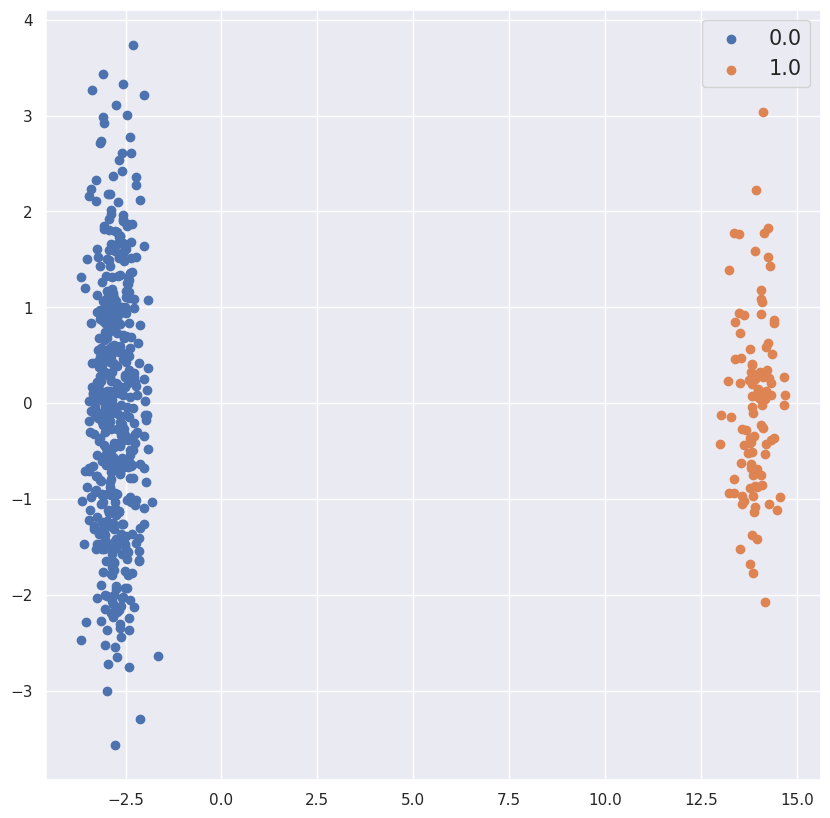

In [16]:
plot_samples(X_pca, x_component=1, y_component=2)

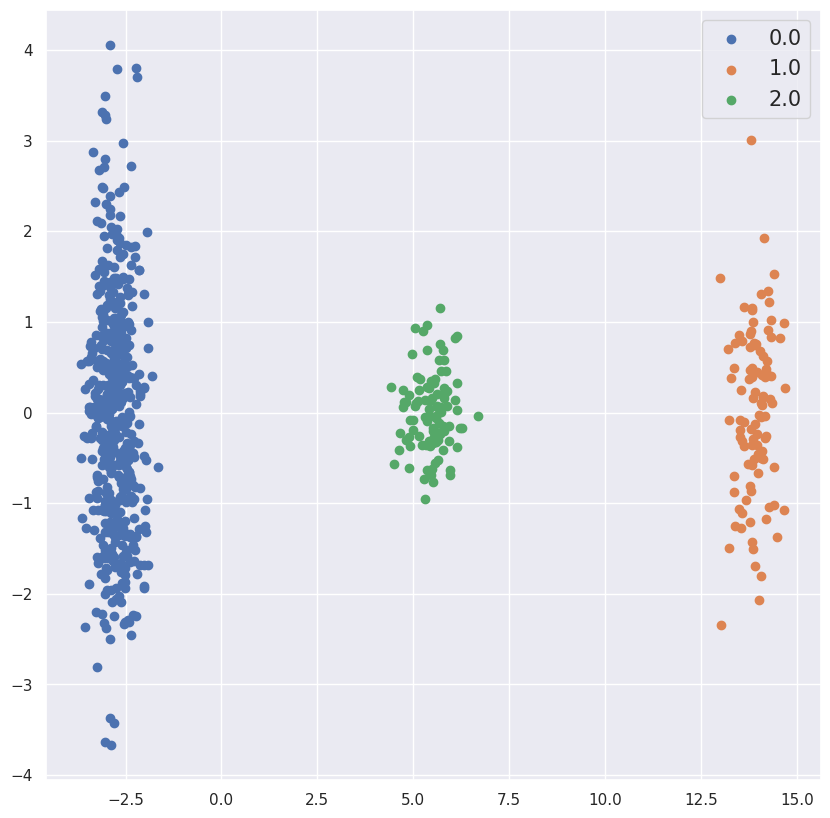

In [17]:
pca_obj = PCA(n_components=2)
X_pca = pca_obj.fit_transform(X)
adm_pop = pca_obj.transform(adm_pop)

X_pca = np.vstack((X_pca, adm_pop))

y = np.zeros(X_pca.shape[0])
y[500:600] = 1
y[600:] = 2


le = LabelEncoder()
labels = le.fit_transform(y)

plot_samples(X_pca, x_component=1, y_component=2)

# Получилось как в обычном PCA

In [18]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X_pca, labels)

clf.centroids_

array([[-2.77976767e+00, -1.58927533e-03],
       [ 1.38988384e+01,  7.94637667e-03],
       [ 5.46412632e+00, -9.45112429e-03]])

In [20]:
A = clf.centroids_[0]
B = clf.centroids_[1]
C = clf.centroids_[2]


dist_A_B = np.linalg.norm(A - B)
dist_A_C = np.linalg.norm(A - C)
dist_B_C = np.linalg.norm(B - C)

print(dist_A_B)
print(dist_A_C)
print(dist_B_C)

16.67860876532446
8.243897746580556
8.434729983680274


# Метрики качества

In [ ]:
from scipy import spatial
from scipy import stats

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestCentroid

In [ ]:
def trustworthiness(X_orig, X_proj, k=7, proj_space='euclidean'):
    n = X_orig.shape[0]

    D_high_list = spatial.distance.pdist(X_orig, 'euclidean')
    D_high_matrix = spatial.distance.squareform(D_high_list)

    D_low_list = spatial.distance.pdist(X_proj, proj_space)
    D_low_matrix = spatial.distance.squareform(D_low_list)

    nn_orig = D_high_matrix.argsort()
    nn_proj = D_low_matrix.argsort()

    knn_orig = nn_orig[:, :k + 1][:, 1:]
    knn_proj = nn_proj[:, :k + 1][:, 1:]

    sum_i = 0

    for i in range(n):
        U = np.setdiff1d(knn_proj[i], knn_orig[i])

        sum_j = 0
        for j in range(U.shape[0]):
            sum_j += np.where(nn_orig[i] == U[j])[0] - k

        sum_i += sum_j

    return float((1 - (2 / (n * k * (2 * n - 3 * k - 1)) * sum_i)).squeeze())

def continuity(X_orig, X_proj, k=7, proj_space='euclidean'):
    n = X_orig.shape[0]

    D_high_list = spatial.distance.pdist(X_orig, 'euclidean')
    D_high_matrix = spatial.distance.squareform(D_high_list)

    D_low_list = spatial.distance.pdist(X_proj, proj_space)
    D_low_matrix = spatial.distance.squareform(D_low_list)

    nn_orig = D_high_matrix.argsort()
    nn_proj = D_low_matrix.argsort()

    knn_orig = nn_orig[:, :k + 1][:, 1:]
    knn_proj = nn_proj[:, :k + 1][:, 1:]

    sum_i = 0

    for i in range(n):
        V = np.setdiff1d(knn_orig[i], knn_proj[i])

        sum_j = 0
        for j in range(V.shape[0]):
            sum_j += np.where(nn_proj[i] == V[j])[0] - k
        
        sum_i += sum_j
    
    return float((1 - (2 / (n * k * (2 * n - 3 * k - 1)) * sum_i)).squeeze())

def shepard_corr(X, X_proj, proj_space='euclidean'):
    D_high_list = spatial.distance.pdist(X, 'euclidean')
    D_low_list = spatial.distance.pdist(X_proj, proj_space)

    return stats.pearsonr(D_high_list, D_low_list)[0]

def edge_metric(X_orig, X_proj, proj_space='euclidean'):
    n = X.shape[0]

    D_high_list = spatial.distance.pdist(X_orig, 'euclidean')
    D_low_list = spatial.distance.pdist(X_proj, proj_space)
    
    max_orig_edge_dist = D_high_list.max()
    max_proj_edge_dist = D_low_list.max()

    D_high_list /= max_orig_edge_dist
    D_low_list /= max_proj_edge_dist

    return 1 - 2 / (n * (n-1)) * np.sum((D_high_list - D_low_list)**2)

def normalized_stress(X_orig, X_proj, proj_space='euclidean'):
    n = X.shape[0]

    D_high_list = spatial.distance.pdist(X_orig, 'euclidean')
    D_low_list = spatial.distance.pdist(X_proj, proj_space)

    return np.sum((D_high_list - D_low_list)**2) / np.sum(D_high_list**2)

def silh_coef(X_orig, X_proj, labels, proj_space='euclidean'):
    n = X_orig.shape[0]

    clf = NearestCentroid()
    clf.fit(X_orig, labels)
    orig_centroids = clf.centroids_

    clf.fit(X_proj, labels)
    proj_centroids = clf.centroids_

    sum_silh = 0
    temp_silh_orig = 0
    temp_silh_proj = 0

    for i in tqdm.tqdm(range(n)):
        x_orig = X_orig[i]
        cur_label = labels[i]

        mask_labels = labels == cur_label

        # Считаем Ax = среднее расстояние между x и другими сэмплами той же метки в исходном пространстве
        X_orig_same_label = X_orig[mask_labels]
        dist_orig_same_label = spatial.distance.pdist(X_orig_same_label, 'euclidean')
        Ax = np.mean(dist_orig_same_label)

        # Считаем Bx: 1. находим ближайший кластер
        #             2. считаем расстояния между x и этим кластером
        X_orig_another_labels = X_orig[~mask_labels]


        clf = NearestCentroid()
        clf.fit(X_orig_another_labels, labels[~mask_labels])
        orig_centroids = clf.centroids_
        orig_classes = clf.classes_
        #print(orig_classes)

        #print(orig_centroids.shape)
        #print(orig_classes)

        #print([spatial.distance.euclidean(x_orig, centroid) for centroid in orig_centroids])
        ind_min_distance_centroid = np.argmin([spatial.distance.euclidean(x_orig, centroid) for centroid in orig_centroids])
        #print('ind_min ', ind_min_distance_centroid)
        #label_Bx = 
        label_Bx = orig_classes[ind_min_distance_centroid]

        #print('ind_min_dist_cent ', ind_min_distance_centroid, label_Bx)

        mask_labels_Bx = labels == label_Bx
        X_for_Bx = X_orig[mask_labels_Bx]

        Bx = np.mean([spatial.distance.euclidean(x_orig, sample_Bx) for sample_Bx in X_for_Bx])
        #dist_orig_Bx_label = spatial.distance.pdist(X_for_Bx, 'euclidean')
        #Bx = np.mean(dist_orig_Bx_label)

        # Второй элемент из silh
        second_el_of_silh = ((Bx - Ax) / np.maximum(Ax, Bx) + 1)*0.5

        # Считаем для вложенного пространства
        x_proj = X_proj[i]

        X_proj_same_label = X_proj[mask_labels]
        dist_proj_same_label = spatial.distance.pdist(X_proj_same_label, proj_space)
        ax = np.mean(dist_proj_same_label) # TODO: переделать для гиперболич случая (или нет, просто же смотрим среднее из расстояний)

        X_proj_another_labels = X_proj[~mask_labels]

        clf = NearestCentroid()
        clf.fit(X_proj_another_labels, labels[~mask_labels])
        proj_centroids = clf.centroids_
        proj_classes = clf.classes_

        # TODO: переделать для гиперболического случая
        ind_min_distance_centroid = np.argmin([spatial.distance.euclidean(x_proj, centroid) for centroid in proj_centroids])
        label_Bx = proj_classes[ind_min_distance_centroid]

        mask_labels_Bx = labels == label_Bx
        X_for_Bx = X_proj[mask_labels_Bx]

        #dist_proj_Bx_label = spatial.distance.pdist(X_for_Bx, proj_space)
        #bx = np.mean(dist_proj_Bx_label)
        # Переделать для гиперболич
        bx = np.mean([spatial.distance.euclidean(x_proj, sample_Bx) for sample_Bx in X_for_Bx])

        first_el_of_silh = ((bx - ax) / np.maximum(ax, bx) + 1)*0.5

        #print(first_el_of_silh, second_el_of_silh)
        # silh
        sum_silh += (first_el_of_silh - second_el_of_silh)**2

        temp_silh_orig += (second_el_of_silh *2) -1
        temp_silh_proj += (first_el_of_silh * 2) - 1
        

        #break

    print(temp_silh_orig / X_orig.shape[0])
    print(silhouette_score(X_orig, labels))

    print('proj:')
    print(temp_silh_proj / X_orig.shape[0])
    print(silhouette_score(X_proj, labels))
    return 1 - sum_silh / n

In [ ]:
def fscore(first_metric, second_metric):
    return 2 * first_metric * second_metric / (first_metric + second_metric)

def union_f(Mt, Mc, Ms, Me, Msilh):
    first_fscore = fscore(Mt, Mc)

    second_sum = (Ms + Me + Msilh) / 3

    return fscore(first_fscore, second_sum)

0.7961713819221273

In [ ]:
(silhouette_score(X, labels) +1) * 0.5

0.5047924493559659

In [ ]:
# TODO: переделать silh_coef, т.к. узнал про функцию silhouette_score
silh_coef(X, X_pca, labels) 

100%|██████████| 700/700 [02:29<00:00,  4.69it/s]


0.015365864148458844
0.009584898711931846
proj:
0.5240677556122217
0.5327658132840588


0.9065290027546077

In [ ]:
(silhouette_samples(X, labels)[0] +1) * 0.5

0.5046935801786093

In [ ]:
(silhouette_samples(X_embeded, labels)[0] +1) * 0.5

0.8585160970687866

100%|██████████| 700/700 [02:55<00:00,  3.99it/s]


0.012001924200899816
0.009584898711931846
proj:
0.04509176096892148
0.44257864


0.9446404147728172

0.5655887978339021

In [ ]:
X_pca.shape

(300, 2)

In [ ]:
# PCA
algorithms = []
algorithms.append('PCA')
Mt = trustworthiness(X, X_pca)
Mc = continuity(X, X_pca)
Ms = shepard_corr(X, X_pca)
Me = edge_metric(X, X_pca)
Msilh = silh_coef(X, X_pca, labels) 

dict_metric_values = {
    'Mt': [Mt],
    'Mc': [Mc],
    'Ms': [Ms],
    'Me': [Me],
    'Msilh': [Msilh]
}
pd.DataFrame(dict_metric_values, index=algorithms)

100%|██████████| 2504/2504 [01:57<00:00, 21.30it/s]


0.17894010125379037
0.1604288070516944
proj:
0.550690471120513
0.5488754567537442


,Mt,Mc,Ms,Me,Msilh
PCA,0.854406,0.902162,0.834564,0.879444,0.942634


In [ ]:
# Объединение метрик
algorithms.append('kernel_pca_poly')

Mt = trustworthiness(X, X_kernel_pca)
Mc = continuity(X, X_kernel_pca)
Ms = shepard_corr(X, X_kernel_pca)
Me = edge_metric(X, X_kernel_pca)
Msilh = silh_coef(X, X_kernel_pca, labels)

dict_metric_values['Mt'].append(Mt)
dict_metric_values['Mc'].append(Mc)
dict_metric_values['Ms'].append(Ms)
dict_metric_values['Me'].append(Me)
dict_metric_values['Msilh'].append(Msilh)

pd.DataFrame(dict_metric_values, index=algorithms)

100%|██████████| 2504/2504 [16:21<00:00,  2.55it/s]


0.17894010125379037
0.1604288070516944
proj:
0.12200012728975432
0.10445171907842389


,Mt,Mc,Ms,Me,Msilh
PCA,0.854406,0.902162,0.834564,0.879444,0.942634
kernel_pca_poly,0.999724,0.999728,0.974638,0.971323,0.998682


In [ ]:
# Объединение метрик
algorithms.append('kernel_pca_cosine')

Mt = trustworthiness(X, X_kernel_pca_cosine)
Mc = continuity(X, X_kernel_pca_cosine)
Ms = shepard_corr(X, X_kernel_pca_cosine)
Me = edge_metric(X, X_kernel_pca_cosine)
Msilh = silh_coef(X, X_kernel_pca_cosine, labels)

dict_metric_values['Mt'].append(Mt)
dict_metric_values['Mc'].append(Mc)
dict_metric_values['Ms'].append(Ms)
dict_metric_values['Me'].append(Me)
dict_metric_values['Msilh'].append(Msilh)

pd.DataFrame(dict_metric_values, index=algorithms)

100%|██████████| 2504/2504 [02:08<00:00, 19.44it/s]


0.17894010125379037
0.1604288070516944
proj:
0.17894010125379028
0.16042880705169477


,Mt,Mc,Ms,Me,Msilh
PCA,0.854406,0.902162,0.834564,0.879444,0.942634
kernel_pca_poly,0.999724,0.999728,0.974638,0.971323,0.998682
kernel_pca_cosine,0.999731,0.999727,1.000000,1.000000,1.000000


In [ ]:
# Объединение метрик
algorithms.append('Isomap')

Mt = trustworthiness(X, X_isomap)
Mc = continuity(X, X_isomap)
Ms = shepard_corr(X, X_isomap)
Me = edge_metric(X, X_isomap)
Msilh = silh_coef(X, X_isomap, labels)

dict_metric_values['Mt'].append(Mt)
dict_metric_values['Mc'].append(Mc)
dict_metric_values['Ms'].append(Ms)
dict_metric_values['Me'].append(Me)
dict_metric_values['Msilh'].append(Msilh)

pd.DataFrame(dict_metric_values, index=algorithms)

100%|██████████| 2504/2504 [01:34<00:00, 26.54it/s]


0.17894010125379037
0.1604288070516944
proj:
0.5773081654664992
0.5640781017776728


,Mt,Mc,Ms,Me,Msilh
PCA,0.854406,0.902162,0.834564,0.879444,0.942634
kernel_pca_poly,0.999724,0.999728,0.974638,0.971323,0.998682
kernel_pca_cosine,0.999731,0.999727,1.000000,1.000000,1.000000
Isomap,0.858250,0.905000,0.818571,0.848782,0.929378


In [ ]:
# Объединение метрик
algorithms.append('MDS')

Mt = trustworthiness(X, X_md_scaling)
Mc = continuity(X, X_md_scaling)
Ms = shepard_corr(X, X_md_scaling)
Me = edge_metric(X, X_md_scaling)
Msilh = silh_coef(X, X_md_scaling, labels)

dict_metric_values['Mt'].append(Mt)
dict_metric_values['Mc'].append(Mc)
dict_metric_values['Ms'].append(Ms)
dict_metric_values['Me'].append(Me)
dict_metric_values['Msilh'].append(Msilh)

pd.DataFrame(dict_metric_values, index=algorithms)

100%|██████████| 2504/2504 [01:31<00:00, 27.23it/s]


0.17894010125379037
0.1604288070516944
proj:
0.4339204806754827
0.38805697574617054


,Mt,Mc,Ms,Me,Msilh
PCA,0.854406,0.902162,0.834564,0.879444,0.942634
kernel_pca_poly,0.999724,0.999728,0.974638,0.971323,0.998682
kernel_pca_cosine,0.999731,0.999727,1.000000,1.000000,1.000000
Isomap,0.858250,0.905000,0.818571,0.848782,0.929378
MDS,0.872020,0.885689,0.802618,0.899329,0.970273


In [ ]:
# Объединение метрик
algorithms.append('TSNE')

Mt = trustworthiness(X, X_embeded)
Mc = continuity(X, X_embeded)
Ms = shepard_corr(X, X_embeded)
Me = edge_metric(X, X_embeded)
Msilh = silh_coef(X, X_embeded, labels)

dict_metric_values['Mt'].append(Mt)
dict_metric_values['Mc'].append(Mc)
dict_metric_values['Ms'].append(Ms)
dict_metric_values['Me'].append(Me)
dict_metric_values['Msilh'].append(Msilh)

pd.DataFrame(dict_metric_values, index=algorithms)

100%|██████████| 2504/2504 [01:31<00:00, 27.33it/s]


0.17894010125379037
0.1604288070516944
proj:
0.6092887432520746
0.6074153


,Mt,Mc,Ms,Me,Msilh
PCA,0.854406,0.902162,0.834564,0.879444,0.942634
kernel_pca_poly,0.999724,0.999728,0.974638,0.971323,0.998682
kernel_pca_cosine,0.999731,0.999727,1.000000,1.000000,1.000000
Isomap,0.858250,0.905000,0.818571,0.848782,0.929378
MDS,0.872020,0.885689,0.802618,0.899329,0.970273
TSNE,0.928603,0.944788,0.803570,0.859412,0.930180


In [ ]:
del dict_metric_values['VAE']

KeyError: ignored

In [ ]:
dict_metric_values['Mt'].pop()
dict_metric_values['Mc'].pop()
dict_metric_values['Ms'].pop()
dict_metric_values['Me'].pop()
dict_metric_values['Msilh'].pop()

0.899249885759201

In [ ]:
# Объединение метрик
algorithms.append('VAE')

Mt = trustworthiness(X, zs)
Mc = continuity(X, zs)
Ms = shepard_corr(X, zs)
Me = edge_metric(X, zs)
Msilh = silh_coef(X, zs, labels)

dict_metric_values['Mt'].append(Mt)
dict_metric_values['Mc'].append(Mc)
dict_metric_values['Ms'].append(Ms)
dict_metric_values['Me'].append(Me)
dict_metric_values['Msilh'].append(Msilh)

pd.DataFrame(dict_metric_values, index=algorithms)

100%|██████████| 2504/2504 [01:35<00:00, 26.29it/s]


0.17894010125379037
0.1604288070516944
proj:
0.47413790202812306
0.47628823


,Mt,Mc,Ms,Me,Msilh
PCA,0.854406,0.902162,0.834564,0.879444,0.942634
kernel_pca_poly,0.999724,0.999728,0.974638,0.971323,0.998682
kernel_pca_cosine,0.999731,0.999727,1.000000,1.000000,1.000000
Isomap,0.858250,0.905000,0.818571,0.848782,0.929378
MDS,0.872020,0.885689,0.802618,0.899329,0.970273
TSNE,0.928603,0.944788,0.803570,0.859412,0.930180
VAE,0.860791,0.875820,0.652282,0.804645,0.970679


In [ ]:
pd.DataFrame(dict_metric_values, index=algorithms)

,Mt,Mc,Ms,Me,Msilh
PCA,0.854406,0.902162,0.834564,0.879444,0.942634
kernel_pca_poly,0.999724,0.999728,0.974638,0.971323,0.998682
kernel_pca_cosine,0.999731,0.999727,1.000000,1.000000,1.000000
Isomap,0.858250,0.905000,0.818571,0.848782,0.929378
MDS,0.872020,0.885689,0.802618,0.899329,0.970273
TSNE,0.928603,0.944788,0.803570,0.859412,0.930180
VAE,0.860791,0.875820,0.652282,0.804645,0.970679


In [ ]:
metrics_1000_genomes = pd.DataFrame(dict_metric_values, index=algorithms)

In [ ]:
metrics_ABCD = pd.DataFrame(dict_metric_values, index=algorithms)

In [ ]:
metrics_ABCD

,Mt,Mc,Ms,Me,Msilh
PCA,0.801809,0.823561,0.752114,0.682706,0.906529
kernel_pca_poly,0.920354,0.920586,0.563658,0.998647,0.999916
kernel_pca_cosine,0.990243,0.989892,0.928088,0.999914,0.999989
Isomap,0.800299,0.843629,0.732322,0.712785,0.954197
MDS,0.751412,0.775121,0.643947,0.778688,0.993383
TSNE,0.851572,0.896568,0.771986,0.669553,0.934613
VAE,0.797621,0.811528,0.666233,0.466889,0.898801


In [ ]:
metrics_1000_genomes.to_csv('metrics_1000_genomes.csv', index=True)

In [ ]:
fscore_metric = {}
fscore_metric['union_f'] = []

fscore_metric['union_f'].append(union_f(*metrics_1000_genomes.loc['PCA']))
fscore_metric['union_f'].append(union_f(*metrics_1000_genomes.loc['kernel_pca_poly']))
fscore_metric['union_f'].append(union_f(*metrics_1000_genomes.loc['kernel_pca_cosine']))
fscore_metric['union_f'].append(union_f(*metrics_1000_genomes.loc['Isomap']))
fscore_metric['union_f'].append(union_f(*metrics_1000_genomes.loc['MDS']))
fscore_metric['union_f'].append(union_f(*metrics_1000_genomes.loc['TSNE']))
fscore_metric['union_f'].append(union_f(*metrics_1000_genomes.loc['VAE']))

pd.DataFrame(fscore_metric, index=algorithms)

,union_f
PCA,0.881573
kernel_pca_poly,0.990553
kernel_pca_cosine,0.999864
Isomap,0.873223
MDS,0.884730
TSNE,0.899058
VAE,0.837682


In [ ]:
# tSNE
trustworthiness(X, X_embeded)

0.8124929971988796

SignificanceResult(statistic=0.9990210110680494, pvalue=0.0)
PearsonRResult(statistic=1.0, pvalue=0.0)


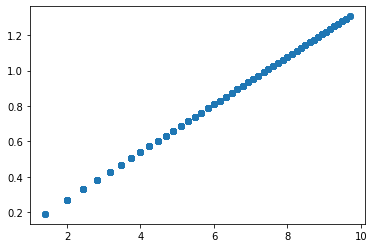

In [ ]:
# Shepard diagram

D_high_list = spatial.distance.pdist(X, 'euclidean')
D_low_list = spatial.distance.pdist(X_kernel_pca_cosine, 'euclidean')

print(stats.spearmanr(D_high_list, D_low_list))
print(stats.pearsonr(D_high_list, D_low_list))

plt.scatter(D_high_list, D_low_list)

# Эмбеддинги из "Hyperbolic image embeddings"

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F

import seaborn as sns
plt.style.use('ggplot')

### Hyperbolic functions and NN

In [ ]:
def tanh(x, clamp=15):
    return x.clamp(-clamp, clamp).tanh()


class Arsinh(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return (x + torch.sqrt_(1 + x.pow(2))).clamp_min_(1e-5).log_()

    @staticmethod
    def backward(ctx, grad_output):
        (input,) = ctx.saved_tensors
        return grad_output / (1 + input ** 2) ** 0.5





def arsinh(x):
    return Arsinh.apply(x)


def _tensor_dot(x, y):
    #print(x)
    #print(x.shape, y.shape)
    res = torch.einsum("ij,kj->ik", (x, y))
    return res


def _mobius_addition_batch(x, y, c):
    xy = _tensor_dot(x, y)  # B x C
    x2 = x.pow(2).sum(-1, keepdim=True)  # B x 1
    y2 = y.pow(2).sum(-1, keepdim=True)  # C x 1
    #print(xy)
    num = 1 + 2 * c * xy + c * y2.permute(1, 0)  # B x C
    num = num.unsqueeze(2) * x.unsqueeze(1)
    num = num + (1 - c * x2).unsqueeze(2) * y  # B x C x D
    denom_part1 = 1 + 2 * c * xy  # B x C
    denom_part2 = c ** 2 * x2 * y2.permute(1, 0)
    denom = denom_part1 + denom_part2
    res = num / (denom.unsqueeze(2) + 1e-5)
    return res


def lambda_x(x, *, c=1.0, keepdim=False):
    r"""
    Compute the conformal factor :math:`\lambda^c_x` for a point on the ball
    .. math::
        \lambda^c_x = \frac{1}{1 - c \|x\|_2^2}
    Parameters
    ----------
    x : tensor
        point on the Poincare ball
    c : float|tensor
        ball negative curvature
    keepdim : bool
        retain the last dim? (default: false)
    Returns
    -------
    tensor
        conformal factor
    """
    c = torch.as_tensor(c).type_as(x)
    return _lambda_x(x, c, keepdim=keepdim)


def _lambda_x(x, c, keepdim: bool = False):
    return 2 / (1 - c * x.pow(2).sum(-1, keepdim=keepdim))


def _mobius_add(x, y, c):
    x2 = x.pow(2).sum(dim=-1, keepdim=True)
    y2 = y.pow(2).sum(dim=-1, keepdim=True)
    xy = (x * y).sum(dim=-1, keepdim=True)
    num = (1 + 2 * c * xy + c * y2) * x + (1 - c * x2) * y
    denom = 1 + 2 * c * xy + c ** 2 * x2 * y2
    return num / (denom + 1e-5)


def expmap(x, u, *, c=1.0):
    r"""
    Exponential map for Poincare ball model. This is tightly related with :func:`geodesic`.
    Intuitively Exponential map is a smooth constant travelling from starting point :math:`x` with speed :math:`u`.
    A bit more formally this is travelling along curve :math:`\gamma_{x, u}(t)` such that
    .. math::
        \gamma_{x, u}(0) = x\\
        \dot\gamma_{x, u}(0) = u\\
        \|\dot\gamma_{x, u}(t)\|_{\gamma_{x, u}(t)} = \|u\|_x
    The existence of this curve relies on uniqueness of differential equation solution, that is local.
    For the Poincare ball model the solution is well defined globally and we have.
    .. math::
        \operatorname{Exp}^c_x(u) = \gamma_{x, u}(1) = \\
        x\oplus_c \tanh(\sqrt{c}/2 \|u\|_x) \frac{u}{\sqrt{c}\|u\|_2}
    Parameters
    ----------
    x : tensor
        starting point on poincare ball
    u : tensor
        speed vector on poincare ball
    c : float|tensor
        ball negative curvature
    Returns
    -------
    tensor
        :math:`\gamma_{x, u}(1)` end point
    """
    c = torch.as_tensor(c).type_as(x)
    return _expmap(x, u, c)


def _expmap(x, u, c):  # pragma: no cover
    sqrt_c = c ** 0.5
    u_norm = torch.clamp_min(u.norm(dim=-1, p=2, keepdim=True), 1e-5)
    second_term = (
        tanh(sqrt_c / 2 * _lambda_x(x, c, keepdim=True) * u_norm)
        * u
        / (sqrt_c * u_norm)
    )
    gamma_1 = _mobius_add(x, second_term, c)
    return gamma_1


def expmap0(u, *, c=1.0):
    r"""
    Exponential map for Poincare ball model from :math:`0`.
    .. math::
        \operatorname{Exp}^c_0(u) = \tanh(\sqrt{c}/2 \|u\|_2) \frac{u}{\sqrt{c}\|u\|_2}
    Parameters
    ----------
    u : tensor
        speed vector on poincare ball
    c : float|tensor
        ball negative curvature
    Returns
    -------
    tensor
        :math:`\gamma_{0, u}(1)` end point
    """
    c = torch.as_tensor(c).type_as(u)
    return _expmap0(u, c)


def _expmap0(u, c):
    sqrt_c = c ** 0.5
    u_norm = torch.clamp_min(u.norm(dim=-1, p=2, keepdim=True), 1e-5)
    gamma_1 = tanh(sqrt_c * u_norm) * u / (sqrt_c * u_norm)
    return gamma_1


def _hyperbolic_softmax(X, A, P, c):
    lambda_pkc = 2 / (1 - c * P.pow(2).sum(dim=1))
    k = lambda_pkc * torch.norm(A, dim=1) / torch.sqrt(c)
    mob_add = _mobius_addition_batch(-P, X, c)
    num = 2 * torch.sqrt(c) * torch.sum(mob_add * A.unsqueeze(1), dim=-1)
    denom = torch.norm(A, dim=1, keepdim=True) * (1 - c * mob_add.pow(2).sum(dim=2))
    logit = k.unsqueeze(1) * arsinh(num / denom)
    return logit.permute(1, 0)


class RiemannianGradient(torch.autograd.Function):

    c = 1

    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x

    @staticmethod
    def backward(ctx, grad_output):
        (x,) = ctx.saved_tensors
        # x: B x d

        scale = (1 - RiemannianGradient.c * x.pow(2).sum(-1, keepdim=True)).pow(2) / 4
        return grad_output * scale


def project(x, *, c=1.0):
    r"""
    Safe projection on the manifold for numerical stability. This was mentioned in [1]_
    Parameters
    ----------
    x : tensor
        point on the Poincare ball
    c : float|tensor
        ball negative curvature
    Returns
    -------
    tensor
        projected vector on the manifold
    References
    ----------
    .. [1] Hyperbolic Neural Networks, NIPS2018
        https://arxiv.org/abs/1805.09112
    """
    c = torch.as_tensor(c).type_as(x)
    return _project(x, c)


def _project(x, c):
    norm = torch.clamp_min(x.norm(dim=-1, keepdim=True, p=2), 1e-5)
    maxnorm = (1 - 1e-3) / (c ** 0.5)
    cond = norm > maxnorm
    projected = x / norm * maxnorm
    return torch.where(cond, projected, x)

In [ ]:
import math

class HyperbolicMLR(nn.Module):
    r"""
    Module which performs softmax classification
    in Hyperbolic space.
    """

    def __init__(self, ball_dim, n_classes, c):
        super(HyperbolicMLR, self).__init__()
        self.a_vals = nn.Parameter(torch.Tensor(n_classes, ball_dim))
        self.p_vals = nn.Parameter(torch.Tensor(n_classes, ball_dim))
        self.c = c
        self.n_classes = n_classes
        self.ball_dim = ball_dim
        self.reset_parameters()

    def forward(self, x, c=None):
        if c is None:
            c = torch.as_tensor(self.c).type_as(x)
        else:
            c = torch.as_tensor(c).type_as(x)
        p_vals_poincare = expmap0(self.p_vals, c=c)
        conformal_factor = 1 - c * p_vals_poincare.pow(2).sum(dim=1, keepdim=True)
        a_vals_poincare = self.a_vals * conformal_factor
        logits = _hyperbolic_softmax(x, a_vals_poincare, p_vals_poincare, c)
        return logits

    def extra_repr(self):
        return "Poincare ball dim={}, n_classes={}, c={}".format(
            self.ball_dim, self.n_classes, self.c
        )

    def reset_parameters(self):
        init.kaiming_uniform_(self.a_vals, a=math.sqrt(5))
        init.kaiming_uniform_(self.p_vals, a=math.sqrt(5))


In [ ]:
class ToPoincare(nn.Module):
    r"""
    Module which maps points in n-dim Euclidean space
    to n-dim Poincare ball
    """

    def __init__(self, c, train_c=False, train_x=False, ball_dim=None, riemannian=True):
        super(ToPoincare, self).__init__()
        if train_x:
            if ball_dim is None:
                raise ValueError(
                    "if train_x=True, ball_dim has to be integer, got {}".format(
                        ball_dim
                    )
                )
            self.xp = nn.Parameter(torch.zeros((ball_dim,)))
        else:
            self.register_parameter("xp", None)

        if train_c:
            self.c = nn.Parameter(torch.Tensor([c,]))
        else:
            self.c = c

        self.train_x = train_x

        self.riemannian = RiemannianGradient
        self.riemannian.c = c

        if riemannian:
            self.grad_fix = lambda x: self.riemannian.apply(x)
        else:
            self.grad_fix = lambda x: x

    def forward(self, x):

        if self.train_x:
            xp = project(expmap0(self.xp, c=self.c), c=self.c)
            return self.grad_fix(project(expmap(xp, x, c=self.c), c=self.c))
        return self.grad_fix(project(expmap0(x, c=self.c), c=self.c))

    def extra_repr(self):
        return "c={}, train_x={}".format(self.c, self.train_x)

### Продолжение

In [ ]:
class Args():
    def __init__(self):
        self.dim = 2
        self.c = 1.0
        self.train_x = False
        self.train_c = False
        self.n_classes = len(np.unique(y))

args = Args()

class GenPoincareNet(nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.act2 = nn.ReLU()
        # Потом заменить на hyperbolic
        self.l3 = nn.Linear(n_hidden, args.dim)
        self.tp = ToPoincare(
            c=args.c, train_x=args.train_x, train_c=args.train_c, ball_dim=args.dim
        )
        self.mlr = HyperbolicMLR(ball_dim=args.dim, n_classes=args.n_classes, c=args.c)
        #self.lsm = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.act1(self.l1(x))
        x = self.act2(self.l2(x))
        x = self.l3(x)
        x = self.tp(x)
        #print(x.shape)
        return F.log_softmax(self.mlr(x, c=self.tp.c), dim=-1)

    def inference(self, x):
        x = self.act1(self.l1(x))
        x = self.act2(self.l2(x))
        x = self.l3(x)
        x = self.tp(x)
        return x


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = GenPoincareNet(X.shape[1], X.shape[1], len(np.unique(y))).to(device)

In [ ]:
loss = torch.nn.NLLLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import tqdm

In [ ]:
np.unique(y)

array([1., 2., 3., 4.])

In [ ]:
X.shape

(225, 3)

In [ ]:
y = y-1

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train

In [ ]:
epochs = 3
batch_size = 32
losses = []

for epoch in tqdm.tqdm(range(1, epochs + 1)):
    #train(args, model, device, train_loader, optimizer, epoch)

    order = np.random.permutation(len(X))
    for start_index in range(0, len(X), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index: start_index + batch_size]

        #print('sdag')
        x_batch = torch.tensor(X[batch_indexes]).float().to(device)
        y_batch = torch.tensor(y[batch_indexes]).long().to(device)

        preds = model(x_batch)

        #print(preds.shape, y_batch.shape)
        loss_value = F.nll_loss(preds, y_batch)
        loss_value.backward()
        losses.append(loss_value.cpu().detach())

        optimizer.step()

    
    

100%|██████████| 3/3 [00:00<00:00,  7.40it/s]


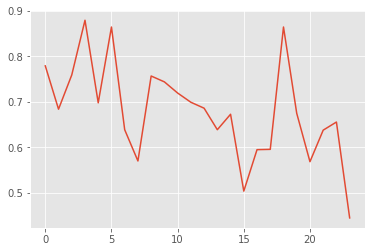

In [ ]:
losses = np.array(losses)
plt.plot(losses[:])

In [ ]:
model.eval()
zs = model.inference(torch.tensor(X).float().to(device)).to('cpu').data.numpy()

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4])

0 1.0
1 2.0
2 3.0
3 4.0


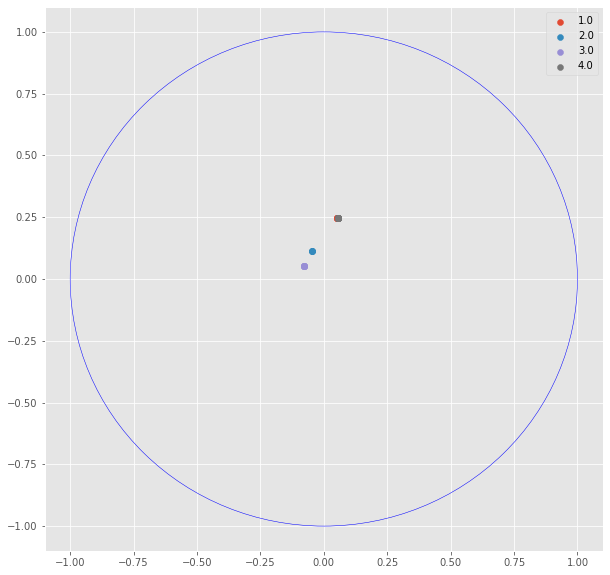

In [ ]:
plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), args.c, color='b', fill=False)
ax = plt.gca()
color_arr = ['red', 'blue', 'purple', 'grey', 'yellow']

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]


  print(cla, le.inverse_transform([cla])[0])
  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])
  #plt.scatter(xc, yc, label=le.inverse_transform([cla])[0], color=color_arr[cla])


ax.add_patch(circle)
plt.legend()
plt.plot()
#plt.savefig('hyperbolic_plot.png', dpi=500)
plt.savefig('hyperbolic_classifier_300_samp.png', dpi=500)

0 1.0
1 2.0
2 3.0
3 4.0


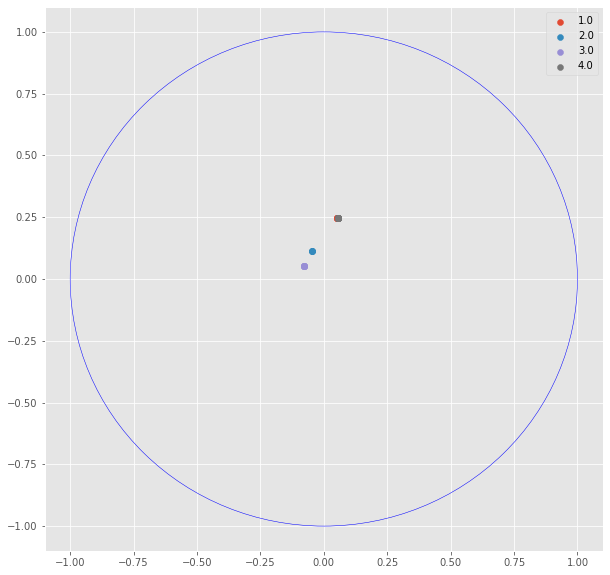

In [ ]:
plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), args.c, color='b', fill=False)
ax = plt.gca()
color_arr = ['red', 'blue', 'purple', 'grey', 'yellow']

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]


  print(cla, le.inverse_transform([cla])[0])
  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])
  #plt.scatter(xc, yc, label=le.inverse_transform([cla])[0], color=color_arr[cla])


ax.add_patch(circle)
plt.legend()
plt.plot()
#plt.savefig('hyperbolic_plot.png', dpi=500)
plt.savefig('hyperbolic_classifier_300_samp.png', dpi=500)

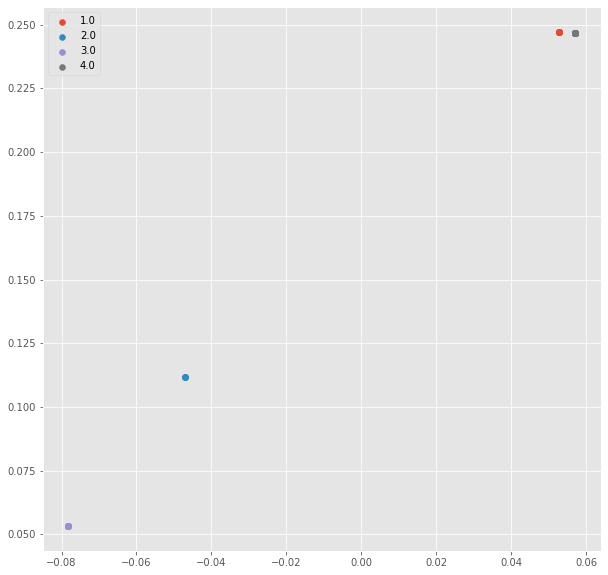

In [ ]:
plt.figure(figsize=(10,10))
#circle = plt.Circle((0,0), args.c, color='b', fill=False)
#ax = plt.gca()

for (i,cla) in enumerate(set(labels)):
  xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
  yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]



  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])


#ax.add_patch(circle)
plt.legend()
plt.plot()
plt.savefig('hyperbolic_classifier_300_samp_zoom.png', dpi=500)

[]

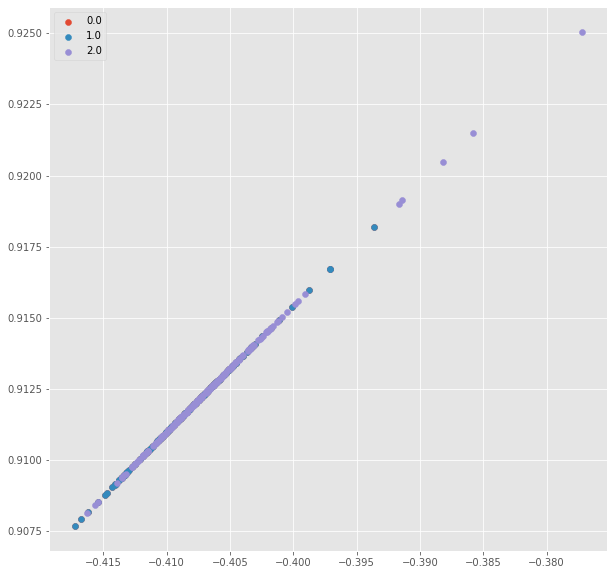

In [ ]:
plt.figure(figsize=(10,10))
#circle = plt.Circle((0,0), args.c, color='b', fill=False)
#ax = plt.gca()

for (i,cla) in enumerate(set(labels)):
  if(cla != 1):
    xc = [p for (j,p) in enumerate(zs[:, 0]) if labels[j]==cla]
    yc = [p for (j,p) in enumerate(zs[:, 1]) if labels[j]==cla]



  plt.scatter(xc, yc, label=le.inverse_transform([cla])[0])


#ax.add_patch(circle)
plt.legend()
plt.plot()
#plt.savefig('hyperbolic_plot.png', dpi=500)